WITH VIDIO 

In [45]:
import tensorflow as tf
model = tf.keras.models.load_model("model/model_dinamis1.h5")

# Cek input shape model
model.input_shape  # (None, 35, 21)

(None, 22, 42)

In [24]:
def normalisasi(data, d2max, d2min=0):
    dmin, dmax = np.min(data), np.max(data)
    return ((data - dmin) / (dmax - dmin)) * (d2max - d2min) + d2min

In [25]:
def normalisasi2(data):
    vektor = [(d-data[0])*100  for d in data[1:] ]
    return vektor

In [26]:
def scale_points(points, new_x_max):
    """
    Melakukan transformasi skala pada kumpulan titik berdasarkan nilai maksimum baru untuk sumbu X.
    
    Parameters:
        points (numpy.ndarray): Array 2D berisi koordinat titik, dengan kolom pertama sebagai X dan kedua sebagai Y.
        new_x_max (float): Nilai maksimum baru untuk sumbu X setelah transformasi.
        
    Returns:
        numpy.ndarray: Array 2D dari titik yang telah ditransformasi.
    """
    # Nilai maksimum awal untuk X
    x_max_original = np.max(points[:, 0])
    
    # Hitung skala
    scale = new_x_max / x_max_original
    
    # Transformasi titik berdasarkan skala
    transformed_points = (points * scale)
    
    return transformed_points[:,0],transformed_points[:,1]
    
    

In [2]:
import numpy as np

arr = [
    100, 101, 102, 103, 104, 105, 106,
    107, 108, 109, 110, 111, 112,
    113, 114, 115, 116, 117, 118, 119, 120
]

indices = [5, 1, 9, 10, 12, 13, 15, 16, 17, 20, 4, 6, 7, 8, 11, 16, 17]

selected =[arr[i] for i in indices]
selected

[105,
 101,
 109,
 110,
 112,
 113,
 115,
 116,
 117,
 120,
 104,
 106,
 107,
 108,
 111,
 116,
 117]

In [3]:
import numpy as np

# Buat array acak 4x7
arr = np.random.randint(1, 10, size=(4, 7))
print("Sebelum:")
print(arr)

# Ubah kolom ke-5 dan ke-6 (alias -2:) pada baris ke-0 jadi 0
arr[0, -4:] = 0

print("\nSetelah:")
print(arr)


Sebelum:
[[8 2 1 1 4 1 3]
 [2 4 8 1 8 3 5]
 [1 4 9 7 4 5 3]
 [6 7 1 9 7 9 4]]

Setelah:
[[8 2 1 0 0 0 0]
 [2 4 8 1 8 3 5]
 [1 4 9 7 4 5 3]
 [6 7 1 9 7 9 4]]


In [8]:
def normalisasi2(data):
    vektor = [(d-data[0] )for d in data[1:] ]
    return vektor
def scale_points(points, new_x_max):
    """
    Melakukan transformasi skala pada kumpulan titik berdasarkan nilai maksimum baru untuk sumbu X.
    
    Parameters:
        points (numpy.ndarray): Array 2D berisi koordinat titik, dengan kolom pertama sebagai X dan kedua sebagai Y.
        new_x_max (float): Nilai maksimum baru untuk sumbu X setelah transformasi.
        
    Returns:
        numpy.ndarray: Array 2D dari titik yang telah ditransformasi.
    """
    # Nilai maksimum awal untuk X
    x_max_original = np.max(points[:, 0])
    
    # Hitung skala
    scale = new_x_max / x_max_original
    
    # Transformasi titik berdasarkan skala
    transformed_points = (points * scale)
    
    return transformed_points[:,0],transformed_points[:,1]
    
    
def normalisasi(data):
    dmin, dmax = np.min(data), np.max(data)
    return (data - dmin) 

In [10]:
import numpy as np

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)

    total = len(seq)
    frame_interval = total / target_len

    trimmed = []
    for i in range(target_len):
        idx = int(np.ceil(i * frame_interval))
        if idx >= total:
            idx = total - 1
        trimmed.append(seq[idx])

    return trimmed


In [4]:
len([5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17])

17

In [5]:
model.input_shape 

NameError: name 'model' is not defined

In [8]:
len([1,9,10,12,13,16,17,20,4,6,8,11,16])+len([2,3,4,7,9,10,11,12,15,19,20,16,17])

26

In [11]:
import pickle

with open('csv/label map/model_2.pkl', 'rb') as f:
    label_map = pickle.load(f)

In [8]:
len(cols_X)+len(cols_Y)
len(cols_Z)

4

In [14]:
label_map

{0: '10',
 1: 'cepat',
 2: 'j',
 3: 'kita',
 4: 'lihat',
 5: 'menang',
 6: 'paham',
 7: 'tidak',
 8: 'z'}

In [36]:
input_shape[2]

30

In [39]:
model = tf.keras.models.load_model("model/model_dinamis2.h5")
model.input_shape  

(None, 22, 30)

In [50]:
s=np.array([1,4,5,7,8,22,34,123,10,54])
s[[4,2,3]]

array([8, 5, 7])

In [15]:
cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])

cols_X = [x - 1 for x in cols_X]
cols_Y = [x - 1 for x in cols_Y]
cols_X

[0, 3, 5, 7, 8, 9, 10, 11, 12, 15, 15, 16, 19]

In [2]:
import numpy as np

In [9]:
def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)

    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]

    total_to_keep = target_len - 2
    step = len(middle) / total_to_keep

    trimmed_middle = [middle[int(i * step)] for i in range(total_to_keep)]

    return [keep_first] + trimmed_middle + [keep_last]

In [10]:
    
def normalisasi(data,dmin):
    
    return (data - dmin) 

In [5]:
[2,3,4,7,9,10,11,12,15,19,20,16,17]+20

TypeError: can only concatenate list (not "int") to list

In [4]:
selected_columns 

[1,
 9,
 10,
 12,
 13,
 16,
 17,
 20,
 4,
 6,
 8,
 11,
 16,
 44,
 47,
 51,
 55,
 22,
 23,
 24,
 27,
 29,
 30,
 31,
 32,
 35,
 39,
 40,
 36,
 37]

In [ ]:
[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,1,2]
k=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,]
len(k)

21

In [3]:
import tensorflow as tf
class TrustGate(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(TrustGate, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.W_tau = self.add_weight(shape=(input_shape[-1], self.units),
                                     initializer='glorot_uniform',
                                     trainable=True)
        self.b_tau = self.add_weight(shape=(self.units,),
                                     initializer='zeros',
                                     trainable=True)

    def call(self, inputs):
        tau = tf.sigmoid(tf.tensordot(inputs, self.W_tau, axes=1) + self.b_tau)
        return tau * inputs

    def get_config(self):
        config = super(TrustGate, self).get_config()
        config.update({"units": self.units})
        return config


# Load model dengan custom_objects
model = tf.keras.models.load_model('model/dinamic/model_13.h5', custom_objects={'TrustGate': TrustGate})

2025-05-04 15:19:52.375283: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 15:19:52.385531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746346792.397622  107982 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746346792.401071  107982 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746346792.409979  107982 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [10]:
[np.nan]*len(cols_X+cols_Y+cols_Z)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [8]:
xo= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,0,1,2,3]
xo[42]


0

In [17]:
cols_X = [4,6,8,10,12,16,19,20]

data = [4, 6, 8, 10, 12, 16, 19, 20]
cols_Y = [x + 21 for x in data]

# cols_Y = [2,3,4,7,9,10,11,12,15,19,20,16,17]
# cols_Y =sorted([23, 24, 25, 28, 30, 31, 32, 33, 36, 40, 41, 37, 38])

cols_Z= [42,43,44,45]
cols_Z2= [5,8,12,20]
selected_columns = cols_X +  cols_Y +cols_Z 
# MediaPipe setup
selected_columns 

[4, 6, 8, 10, 12, 16, 19, 20, 25, 27, 29, 31, 33, 37, 40, 41, 42, 43, 44, 45]

In [22]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
s=''
# ==================== SETUP ====================
import pickle

with open('csv/label map/model_2.pkl', 'rb') as f:
    label_map = pickle.load(f)
# Load model
model = tf.keras.models.load_model("model/dinamic/model_11.h5")

# Cek input shape model
input_shape = model.input_shape  # (None, 35, 21)
frame_count = input_shape[1]     # 35
feature_per_frame = input_shape[2]  # 21

# Mapping label

# cols_X = [5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17]
# cols_Y = [2,3,4,7,9,10,11,12,15,19,20,16,17]

# cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_X = [4,6,8,10,12,16,19,20]

data = [4, 6, 8, 10, 12, 16, 19, 20]
cols_Y = [x + 21 for x in data]

# cols_Y = [2,3,4,7,9,10,11,12,15,19,20,16,17]
# cols_Y =sorted([23, 24, 25, 28, 30, 31, 32, 33, 36, 40, 41, 37, 38])

cols_Z= [42,43,44,45]
cols_Z2= [5,8,12,20]
selected_columns = cols_X +  cols_Y +cols_Z 
# MediaPipe setup
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Inisialisasi deque untuk menyimpan fitur dari frame sebelumnya
sequence = deque(maxlen=35)
a=0
# Buka video
cap = cv2.VideoCapture('video2/85.mp4')
if not cap.isOpened():
    print("Gagal membuka video.")
    exit()
k=False
# ==================== LOOP VIDEO FRAME ====================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocessing untuk MediaPipe
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    label_text = "Menunggu 35 frame..."

    if result.hand_landmarks:
        a+=1
        for hand in result.hand_landmarks:
            
            features = []
            
                
            nilai_X = np.array([landmark.x for landmark in hand])
            nilai_Y = np.array([landmark.y for landmark in hand])
            nilai_Z = np.array([landmark.z for landmark in hand])[cols_Z2]

      
            features = np.concatenate([
                    nilai_X,
                    nilai_Y,
                    nilai_Z,
                  
                ])
            


            sequence.append(features)
    # else:
    #     features = [np.nan]*(21 + 21 + len(cols_Z2))
    #     sequence.append(features)



    if len(sequence) ==35:
     
        trimmed = trim_sequence(sequence, target_len=25)
        trimmed_array = np.array(trimmed)  # Ubah deque/list menjadi array 2D

        xmin = np.min(trimmed_array[0, :21]) 
        ymin = np.min(trimmed_array[0, 21:42])  # Ambil nilai minimum dari seluruh X (kolom 0–20)
        trimmed_array[:, :21] -= xmin        # Kurangi semua nilai X dengan xmin
        trimmed_array[:, 21:42] -= ymin        # Kurangi semua nilai X dengan xmin
   
        trimmed = trimmed_array[:, selected_columns]
    
        input_data = np.array(trimmed).reshape(1, 25, len(trimmed[0]))
   
        prediction = model.predict(input_data, verbose=0)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
        
        if  (confidence > 0.9):
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            # s=label_map[predicted_class]
            print(label_text)
    # if len(sequence) == 38:
    # # Ubah deque ke array
    #     full_array = np.array(sequence, dtype=np.float32)  # shape = (38, fitur)

    #     # Interpolasi NaN per kolom
    #     for col in range(full_array.shape[1]):
    #         col_values = full_array[:, col]
    #         nans = np.isnan(col_values)
    #         if np.any(nans) and np.sum(~nans) > 1:  # minimal 2 nilai agar bisa interpolasi
    #             # Gunakan interpolasi linear antar nilai yang valid
    #             valid_idx = np.where(~nans)[0]
    #             valid_vals = col_values[valid_idx]
    #             full_array[nans, col] = np.interp(np.where(nans)[0], valid_idx, valid_vals)
    #         elif np.sum(~nans) == 1:
    #             # Jika cuma ada 1 nilai valid → isi semuanya dengan nilai itu
    #             full_array[nans, col] = col_values[~nans][0]

    #     # Trim jadi 25 timestep
    #     trimmed = np.array(trim_sequence(full_array, target_len=25))


    #     # Normalisasi spatial berdasarkan frame awal
    #     xmin = np.min(trimmed[0, :21]) 
    #     ymin = np.min(trimmed[0, 21:42])
    #     trimmed[:, :21] -= xmin
    #     trimmed[:, 21:42] -= ymin

    #     # Ambil hanya kolom yang dipilih
    #     trimmed = trimmed[:, selected_columns]

    #     # Bentuk input
    #     input_data = trimmed.reshape(1, 25, len(trimmed[0]))

    #     # Prediksi
    #     prediction = model.predict(input_data, verbose=0)
    #     predicted_class = np.argmax(prediction)
    #     confidence = np.max(prediction)

    #     if confidence > 0.9:
    #         label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
    #         s = label_map[predicted_class]
    #         print(label_text)


    # else:
        
    #     print(len(sequence))
    # ==================== TAMPILKAN HASIL ====================
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
print(a)
# ==================== SELESAI ====================
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1746370165.605932   10213 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1746370165.611330   68517 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1746370165.660207   68518 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746370165.681576   68530 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


lihat (0.91)
lihat (0.99)
lihat (0.99)
lihat (0.99)
lihat (1.00)
lihat (1.00)
lihat (1.00)
lihat (0.99)
lihat (0.99)
lihat (0.99)
lihat (0.98)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
lihat (0.97)
j (0.92)
j (0.96)
j (0.98)
j (0.98)
j (0.97)
j (0.97)
j (0.95)
j (0.93)
menang (0.97)
menang (1.00)
menang (1.00)
menang (1.00)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.99)
menang (0.98)
paham (0.93)
paham (0.98)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
paham (0.99)
p

In [41]:
input_data[0]

array([[[ 5.55267302e+00,  4.00553383e+00,  2.97857649e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 5.45309890e+00,  4.14128657e+00,  2.76753588e+00, ...,
         -5.68091869e-04, -4.14782763e-03, -4.70882654e-03],
        [ 5.56296307e+00,  4.06510881e+00,  2.89787088e+00, ...,
          2.65777111e-04,  1.25557184e-03,  1.71250105e-03],
        ...,
        [ 4.69980414e+00,  4.69144266e+00,  1.02620271e+00, ...,
         -6.03571534e-03,  5.89740276e-03,  5.16951084e-03],
        [ 5.20940748e+00,  4.97202066e+00,  1.46059476e+00, ...,
         -8.81057978e-03,  6.27863407e-03,  7.77918100e-03],
        [ 2.75593061e+00,  6.07231492e+00, -3.01098025e+00, ...,
         -1.84898674e-02, -3.96609306e-04, -1.68466568e-03]]])

In [8]:
def normalisasi2(data):
    vektor = [(d-data[0] )for d in data[1:] ]
    return vektor
def scale_points(points, new_x_max):
    """
    Melakukan transformasi skala pada kumpulan titik berdasarkan nilai maksimum baru untuk sumbu X.
    
    Parameters:
        points (numpy.ndarray): Array 2D berisi koordinat titik, dengan kolom pertama sebagai X dan kedua sebagai Y.
        new_x_max (float): Nilai maksimum baru untuk sumbu X setelah transformasi.
        
    Returns:
        numpy.ndarray: Array 2D dari titik yang telah ditransformasi.
    """
    # Nilai maksimum awal untuk X
    x_max_original = np.max(points[:, 0])
    
    # Hitung skala
    scale = new_x_max / x_max_original
    
    # Transformasi titik berdasarkan skala
    transformed_points = (points * scale)
    
    return transformed_points[:,0],transformed_points[:,1]
    
    
def trim_sequence(seq, target_len=20):
    if len(seq) <= target_len:
        return list(seq)

    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]

    total_to_keep = target_len - 2
    step = len(middle) / total_to_keep

    trimmed_middle = [middle[int(i * step)] for i in range(total_to_keep)]

    return [keep_first] + trimmed_middle + [keep_last]
def normalisasi(data):
    dmin, dmax = np.min(data), np.max(data)
    return (data - dmin) 


In [9]:
cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
# cols_Z = 
cols_RX= [4,6,8,10,12,16,19,20]
cols_RY= [4,6,8,10,12,16,19,20]

# cols_Z= [4,7,11,15]
cols_Z = [5,8,12,20]


In [40]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
s=''
# ==================== SETUP ====================
import pickle

with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)
# Load model
model = tf.keras.models.load_model("model/dinamic/1.h5")

# Cek input shape model
input_shape = model.input_shape  # (None, 35, 21)
frame_count = input_shape[1]     # 35
feature_per_frame = input_shape[2]  # 21

# Mapping label

# cols_X = [5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17]
# cols_Y = [2,3,4,7,9,10,11,12,15,19,20,16,17]

# cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])


base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Inisialisasi deque untuk menyimpan fitur dari frame sebelumnya
sequence = deque(maxlen=30)
a=0
# Buka video
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Gagal membuka video.")
    exit()
k=False
# ==================== LOOP VIDEO FRAME ====================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocessing untuk MediaPipe
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    label_text = "Menunggu 35 frame..."

    if result.hand_landmarks:
        a+=1
        for hand in result.hand_landmarks:
            
            features = []
            
                
            nilai_X = np.array([landmark.x for landmark in hand])
            nilai_Y = np.array([landmark.y for landmark in hand])
            nilai_Z = np.array([landmark.z for landmark in hand])[cols_Z]
        
            try:
                vektorX = nilai_X[cols_RX] - X_before
                vektorY = nilai_Y[cols_RY] - Y_before
            except:
                vektorX = [0]*8
                vektorY = [0]*8
            X_before = nilai_X[cols_RX]
            Y_before = nilai_Y[cols_RY]

            # Normalisasi dan scaling
            newX = normalisasi(nilai_X)
            newY = normalisasi(nilai_Y)
            newXY = np.column_stack((newX, newY) )  # Simpan dalam list koordinat int
            
            newX , newY = scale_points(newXY,1)
            features = np.concatenate([
                np.array(newX)[cols_X],
                np.array(newY)[cols_Y],
                np.array(nilai_Z),
                np.array(vektorX),
                np.array(vektorY)
            ])

            if len(features) == feature_per_frame:
                sequence.append(features)
        
            
    
    # else:
    #     features = [np.nan]*(21 + 21 + len(cols_Z2))
    #     sequence.append(features)



    if len(sequence) ==30:
     
        trimmed = trim_sequence(sequence, target_len=25)
        trimmed_array = np.array(trimmed)  # Ubah deque/list menjadi array 2D




    
        input_data = np.array(trimmed).reshape(1, 25, len(trimmed[0]))
   
        prediction = model.predict(input_data, verbose=0)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
        
        if  (confidence > 0.9):
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            # s=label_map[predicted_class]
            print(label_text)
    
    # ==================== TAMPILKAN HASIL ====================
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
print(a)
# ==================== SELESAI ====================
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1747036046.513821   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747036046.516752  179282 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747036046.563765  179283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747036046.598203  179298 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
10 (0.98)
35


In [4]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
import pickle

# ==================== SETUP ====================
with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)

model = tf.keras.models.load_model("model/dinamic/1.h5")
input_shape = model.input_shape
frame_count = input_shape[1]     # 35
feature_per_frame = input_shape[2]  # 21

# Kolom koordinat yang digunakan (disesuaikan dengan model Anda)

# MediaPipe detector
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)


# ==================== MAIN ====================
cap = cv2.VideoCapture('video2/test/1.mp4')
if not cap.isOpened():
    print("Gagal membuka video.")
    exit()

sequence = deque(maxlen=30)
X_before = np.zeros(len(cols_RX))
Y_before = np.zeros(len(cols_RY))
label_text = "Menunggu 35 frame..."
predict_counter = 0
a = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    if result.hand_landmarks:
        a += 1
        hand = result.hand_landmarks[0]
        coords = np.array([(lm.x, lm.y, lm.z) for lm in hand])  # (21, 3)

        nilai_X = coords[:, 0]
        nilai_Y = coords[:, 1]
        nilai_Z = coords[cols_Z, 2]

        vektorX = nilai_X[cols_RX] - X_before
        vektorY = nilai_Y[cols_RY] - Y_before
        X_before[:] = nilai_X[cols_RX]
        Y_before[:] = nilai_Y[cols_RY]

        norm_X = normalisasi(nilai_X)
        norm_Y = normalisasi(nilai_Y)
        stacked = np.column_stack((norm_X, norm_Y))
        scaled_X, scaled_Y = scale_points(stacked, 1)

        features = np.concatenate([
            scaled_X[cols_X],
            scaled_Y[cols_Y],
            nilai_Z,
            vektorX,
            vektorY
        ]).astype(np.float32)

        if len(features) == feature_per_frame:
            sequence.append(features)

    # Hanya prediksi setiap 2 frame
    if len(sequence) == 30 and predict_counter == 0:
        trimmed = trim_sequence(sequence, target_len=25)
        input_data = np.array(trimmed).reshape(1, 25, -1)

        prediction = model.predict(input_data, verbose=0)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)

        if confidence > 0.9:
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            print(label_text)

    predict_counter = (predict_counter + 1) % 2

    # Tampilkan hasil
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

print("Jumlah frame tangan terdeteksi:", a)
cap.release()
cv2.destroyAllWindows()


2025-05-11 19:23:51.681737: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 19:23:51.698184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746966231.717729   11251 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746966231.723550   11251 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746966231.738370   11251 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

lihat (0.98)
lihat (0.97)
lihat (0.98)
lihat (0.97)
lihat (0.94)
paham (0.92)
paham (0.94)
paham (0.95)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.96)
paham (0.95)
lihat (0.91)
lihat (0.92)
lihat (0.94)
lihat (0.97)
lihat (0.98)
lihat (0.98)
lihat (0.98)
lihat (0.97)
lihat (0.98)
lihat (0.98)
lihat (0.98)
Jumlah frame tangan terdeteksi: 98


In [17]:
label_map

{0: '10',
 1: 'cepat',
 2: 'j',
 3: 'kita',
 4: 'lihat',
 5: 'menang',
 6: 'paham',
 7: 'tidak',
 8: 'z'}

In [ ]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
import threading
import pickle

# ========== SETUP ==========
with open('csv/label map/model_2.pkl', 'rb') as f:
    label_map = pickle.load(f)

model = tf.keras.models.load_model("model/dinamic/model_12.h5")
input_shape = model.input_shape
frame_count = input_shape[1]
feature_per_frame = input_shape[2]

base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# ========== DEQUE DAN PREDIKSI ==========
sequence = deque(maxlen=35)
X_before = Y_before = None
label_text = "Menunggu prediksi..."




# ========== FUNGSI THREAD ==========
def capture_and_predict():
    global label_text, X_before, Y_before

    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Proses frame
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        if result.hand_landmarks:
            for hand in result.hand_landmarks:
                nilai_X = np.array([lm.x for lm in hand])
                nilai_Y = np.array([lm.y for lm in hand])
                nilai_Z = np.array([lm.z for lm in hand])[cols_Z]

                try:
                    vektorX = nilai_X[cols_RX] - X_before
                    vektorY = nilai_Y[cols_RY] - Y_before
                except:
                    vektorX = [0] * len(cols_RX)
                    vektorY = [0] * len(cols_RY)

                X_before = nilai_X[cols_RX]
                Y_before = nilai_Y[cols_RY]

                newX = normalisasi(nilai_X)
                newY = normalisasi(nilai_Y)
                newXY = np.column_stack((newX, newY))
                newX, newY = scale_points(newXY, 10)

                features = np.concatenate([
                    np.array(newX)[cols_X],
                    np.array(newY)[cols_Y],
                    np.array(nilai_Z),
                    np.array(vektorX),
                    np.array(vektorY)
                ])

                if len(features) == feature_per_frame:
                    sequence.append(features)

        if len(sequence) == 35:
            trimmed = trim_sequence(sequence, target_len=25)
            input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
            prediction = model.predict(input_data, verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)

            if confidence > 0.7:
                label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            else:
                label_text = "Confidence rendah"

        # Tampilkan hasil
        cv2.putText(frame, label_text, (10, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
        cv2.imshow("Realtime Gesture Detection", frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


2025-05-06 00:35:44.906468: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 00:35:44.916332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746466544.928101   59975 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746466544.931508   59975 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746466544.940529   59975 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

W0000 00:00:1746466547.873676   60193 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1746466550.414836   60142 cuda_dnn.cc:529] Loaded cuDNN version 90300


In [ ]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
import threading
import queue

# ==================== SETUP ====================

# Load model
model = tf.keras.models.load_model("model/model_dinamis1.h5")

# Cek input shape model
input_shape = model.input_shape  # (None, 35, 21)
frame_count = input_shape[1]     # 35
feature_per_frame = input_shape[2]  # 21

# Mapping label
label_map = {
    0: '10',
    1: 'j',
    2: 'kita',
    3: 'lihat',
    4: 'menang',
    5: 'paham',
    6: 'percaya',
    7: 'tidak',
    8: 'z'
}

cols_X = [5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17]
cols_Y = [2,3,4,7,9,10,11,12,15,19,20,16,17]

# MediaPipe setup
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Queue untuk antar thread
frame_queue = queue.Queue(maxsize=1)
result_queue = queue.Queue(maxsize=1)

# Sequence buffer
sequence = deque(maxlen=34)

# Untuk simpan posisi sebelumnya
X_before = None
Y_before = None
a=0
# ==================== Worker Thread ====================
def worker_thread():
    global X_before, Y_before
    while True:
        frame = frame_queue.get()
        if frame is None:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        label_text = "Menunggu 35 frame..."

        if result.hand_landmarks:
            a+=1
            
            for hand in result.hand_landmarks:
                features = []
                z_coor = []

                for idx, landmark in enumerate(hand):
                    if idx in [0]:
                        z_coor.append(landmark.y)
                        break

                nilai_X = np.array([landmark.x for landmark in hand])
                nilai_Y = np.array([landmark.y for landmark in hand])

                try:
                    vektorX = (nilai_X[[5,13]] - X_before)*100
                    vektorY =( nilai_Y[[5,13]] - Y_before)*100
                except:
                    vektorX = [0,0]
                    vektorY = [0,0]

                X_before = nilai_X[[5,13]]
                Y_before = nilai_Y[[5,13]]

                # Normalisasi dan scaling
                newX = normalisasi2(nilai_X)
                newY = normalisasi2(nilai_Y)

                features = np.concatenate([
                    np.array(newX)[[i-1 for i in cols_X]],
                    np.array(newY)[[i-1 for i in cols_Y]],
                    np.array(z_coor),
                    np.array(vektorX),
                    np.array(vektorY)
                ])

                if len(features) == feature_per_frame:
                    sequence.append(features)

        if len(sequence) == 34:
            trimmed = trim_sequence(sequence, target_len=20)
            trimmed[0][-4:] = 0

            input_data = np.array(trimmed).reshape(1, 20, feature_per_frame)
            
            prediction = model.predict(input_data, verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)

            # if confidence > 0.8:
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            # else:
            #     label_text = "Confidence rendah"

        result_queue.put(label_text)

# ==================== Jalankan Thread ====================
thread = threading.Thread(target=worker_thread)
thread.start()

# ==================== Buka Kamera ====================
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Gagal membuka kamera.")
    exit()

# ==================== Main Loop ====================
label_text = "Menunggu prediksi..."

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Kirim frame ke worker kalau kosong
    if frame_queue.empty():
        frame_queue.put(frame.copy())

    # Ambil hasil prediksi
    if not result_queue.empty():
        label_text = result_queue.get()

    # Tampilkan hasil
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ==================== Cleanup ====================
frame_queue.put(None)
thread.join()

cap.release()
cv2.destroyAllWindows()


2025-04-28 21:55:09.764053: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 21:55:09.764829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 21:55:09.768763: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-28 21:55:09.780004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745852109.798664  176183 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745852109.80

[ 0.16623105  0.10319284  0.11400534  0.14951983  0.19511817  0.05387402
  0.0970255   0.1156432  -0.01335321 -0.02155675  0.29947548  0.20399563
  0.22937201  0.25159724  0.17424926  0.1156432  -0.01335321 -0.09149259
 -0.17222619 -0.23541251 -0.44553868 -0.28236705 -0.41094124 -0.49304187
 -0.56280035 -0.482959   -0.40945755 -0.4734613  -0.55879262 -0.24465623
  0.58328128  0.          0.          0.          0.        ]
[ 0.15918644  0.09462734  0.10781354  0.15066703  0.20617612  0.04702491
  0.09883451  0.11885379 -0.01973344 -0.02569389  0.29678707  0.20275326
  0.23298059  0.25925376  0.18061031  0.11885379 -0.01973344 -0.07835329
 -0.15363055 -0.21859553 -0.42731056 -0.27008498 -0.39210653 -0.47282168
 -0.54135478 -0.47780123 -0.40192997 -0.46289012 -0.55308434 -0.24359152
  0.58608603  0.          0.          0.          0.        ]
[ 0.16440426  0.0968812   0.11358002  0.16020404  0.21714737  0.05084747
  0.11120731  0.13307367 -0.01783711 -0.01084322  0.29816304  0.21176292


# A=[4,6,7]-1
A

In [18]:
[newX[i-1] for i in cols_X]

[5.344488058993418,
 4.862725916083305,
 3.0361821286676602,
 3.6643433792403552,
 5.679546334193772,
 0.9634049214684152,
 2.983103087117691,
 3.731197574922718,
 -0.5073061141976531,
 2.021927993327787,
 10.0,
 5.67088860918689,
 6.708728632511193,
 7.6076310899946264,
 4.829184533224432,
 3.731197574922718,
 -0.5073061141976531]

In [11]:
len(newX)

20

REALTIME IMPLEMENTATION

In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf

# ==================== SETUP ====================

# Load model
model = tf.keras.models.load_model("model/model_2.h5")

# Ambil input shape model (misalnya: (None, 35, 21))
input_shape = model.input_shape
frame_count = input_shape[1]         # 35
feature_per_frame = input_shape[2]   # 21

# Mapping label (pastikan ini sesuai urutan training)
label_map = {0: 'paham', 1: 'percaya',2: 'tidak', 3: 'kita'}

# Setup MediaPipe
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Inisialisasi buffer untuk menyimpan frame
sequence = deque(maxlen=frame_count)

# Buka webcam (real-time)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Tidak dapat membuka webcam.")
    exit()

# ==================== LOOP FRAME REAL-TIME ====================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Ubah ke RGB untuk MediaPipe
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    label_text = "Menunggu 35 frame..."

    # Ambil fitur dari hand landmarks jika ada
    if result.hand_landmarks:
        for hand in result.hand_landmarks:
            features = []
            x_coor = []
            y_coor = []
            for idx, landmark in enumerate(hand):
                # features.append(landmark.x) 
                if idx in [0,1,3,4,5,7,9,11,12,14,15,17,19,21]:
                    x_coor.append(landmark.x)
                if idx in [0,1,3,4,11,12]:
                    y_coor.append(landmark.y)
                  # Hanya nilai x
            features = x_coor +y_coor
            if len(features) == feature_per_frame:
                sequence.append(features)
    # Jika sudah cukup 35 frame, prediksi gesture
    if len(sequence) == frame_count:
        input_data = np.array(sequence).reshape(1, frame_count, feature_per_frame)
        prediction = model.predict(input_data, verbose=0)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
        label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
       

    # Tampilkan hasil prediksi di layar
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

    # Tampilkan frame di jendela
    cv2.imshow("Real-time Gesture Prediction", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# ==================== SELESAI ====================
cap.release()
cv2.destroyAllWindows()


2025-04-27 20:22:09.496387: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 20:22:09.497105: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 20:22:09.500736: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 20:22:09.511041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745760129.528264   13558 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745760129.53

In [11]:
indek = [1,4,3]

iw = [0,6,7,63,88]
[iw[i] for i in indek]+[3,6]

[6, 88, 63, 3, 6]

In [1]:
def normalisasi(data, d2max, d2min=0):
    dmin, dmax = np.min(data), np.max(data)
    return ((data - dmin) / (dmax - dmin)) * (d2max - d2min) + d2min

In [8]:
len(column_numbers)

10

In [9]:
len(column_numbersY)

14

IMPLEMENTASI DATA STATIS WITH NORMALISASI

In [ ]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
import pickle
# ==================== SETUP ====================
with open('csv/label map/static.pkl', 'rb') as f:
    label_map = pickle.load(f)
# Load model
model = tf.keras.models.load_model('model/static/model_1.h5')

# label_map={
#   0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g',
#   7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm', 12: 'n',
#   13: 'o', 14: 'p', 15: 'q', 16: 'r', 17: 's',
#   18: 't', 19: 'u', 20: 'v', 21: 'w', 22: 'x', 23: 'y'
# }
column_numbersX = sorted([5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17])  # Ganti dengan indeks kolom yang diinginkan
column_numbersY = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
columnZ = [5,8,12,20]
# MediaPipe setup
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# Inisialisasi deque untuk menyimpan fitur dari frame sebelumnya


# Buka video
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Gagal membuka video.")
    exit()
# ==================== LOOP VIDEO FRAME ====================
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocessing untuk MediaPipe
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    label_text = "Menunggu 35 frame..."

    if result.hand_landmarks:
        for hand in result.hand_landmarks:
            landmark_points = []  # Menyimpan titik untuk koneksi garis

            # Ekstrak semua titik koordinat
            nilai_X = np.array([landmark.x for landmark in hand])
            nilai_Y = np.array([landmark.y for landmark in hand])
            nilai_Z = np.array([landmark.z for landmark in hand])[columnZ]
            
            newX = normalisasi(nilai_X)
            newY = normalisasi(nilai_Y)
       
            newXY = np.column_stack((newX, newY))
            newX, newY = scale_points(newXY, 10)
            features = np.concatenate([
                       np.array(newX)[column_numbersX ],
                       np.array(newY)[column_numbersY],
                       np.array(nilai_Z)
                        
                ])
                #z_coords.append(landmark.z)
    
            # Buat dictionary untuk DataFrame dengan format X1, X2,..., Y1, Y2,..., Z
            # row_data = {f"X{idx}": x for idx, x in zip(range(0,21),newX)}
            # row_data.update({f"Y{idx}": y for idx, y in zip(range(0,21),newY)})
            # row_data.update({f"Z{idx}": y for idx, y in zip(range(0,21),newY)})
                  # Hanya nilai x
          
         
            
     

            prediction = model.predict(features, verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"

      

    # ==================== TAMPILKAN HASIL ====================
    cv2.putText(frame, label_text, (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
       

# ==================== SELESAI ====================
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1746421000.812938    4988 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1212 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1746421001.810422    4988 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1746421001.814956    9783 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1746421001.876630    9793 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746421001.917231    9797 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746421002.483160    9810 landmark_projection_calcula

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32,), dtype=float32). Expected shape (None, 34), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=float32)
  • training=False
  • mask=None

: 

/tmp/ipykernel_139951/2909708239.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', 5)


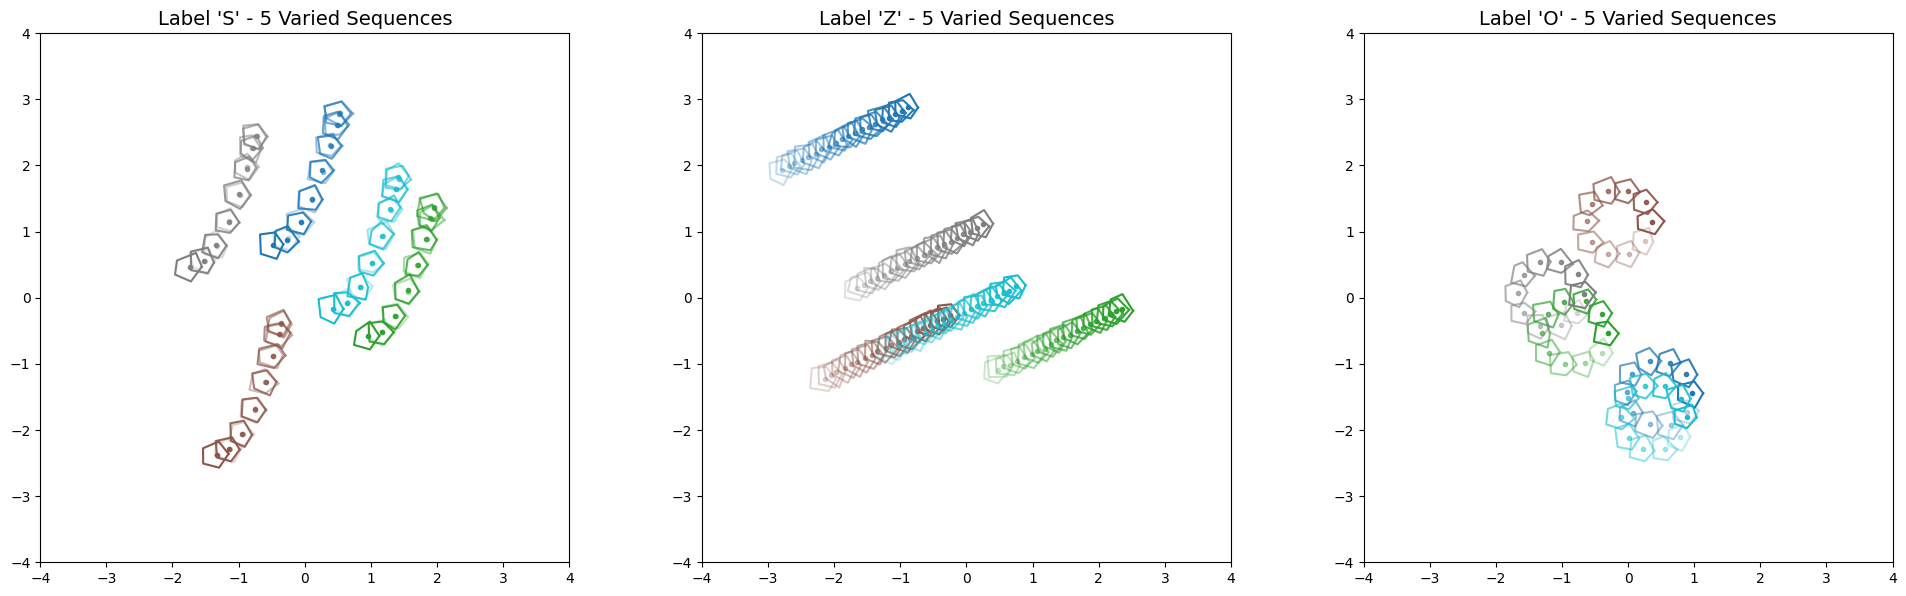

In [13]:
# Revisi dengan membuat semua 5 sequence per label memiliki posisi awal (titik start) yang berbeda
# Kita akan mendistribusikan posisi awal secara acak namun tetap terpisah agar variasi jelas

np.random.seed(42)  # reproducibility
start_positions = {
    'S': [np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)]) for _ in range(5)],
    'Z': [np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)]) for _ in range(5)],
    'O': [np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)]) for _ in range(5)],
}

# Bangun ulang dataset dengan posisi awal yang bervariasi
all_data = []
sequence_id = 0
sequences_per_label = 5

for label in labels:
    T = timestep_map[label]
    for seq_num in range(sequences_per_label):
        shift = start_positions[label][seq_num]
        for t in range(T):
            center = center_trajectory(label, t, T) + shift
            shape = pentagon_shape()
            jitter = np.random.normal(0, 0.02, shape.shape)
            coords = shape + jitter + center
            row = {}
            for i in range(n_points):
                row[f'X{i}'] = coords[i, 0]
                row[f'Y{i}'] = coords[i, 1]
            row['timestep'] = t
            row['sequence'] = sequence_id
            row['Label'] = label
            all_data.append(row)
        sequence_id += 1

# Buat DataFrame
df_varied_start = pd.DataFrame(all_data)

# Visualisasi 5 sequence per label dengan posisi awal berbeda
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for idx, label in enumerate(labels):
    ax = axs[idx]
    df_label = df_varied_start[df_varied_start['Label'] == label]
    sequences = sorted(df_label['sequence'].unique())
    cmap = cm.get_cmap('tab10', 5)

    for i, seq_id in enumerate(sequences):
        seq_df = df_label[df_label['sequence'] == seq_id]
        timesteps = sorted(seq_df['timestep'].unique())
        T = len(timesteps)
        for t_idx, t in enumerate(timesteps):
            frame = seq_df[seq_df['timestep'] == t]
            x = [frame[f'X{j}'].values[0] for j in range(n_points)] + [frame[f'X0'].values[0]]
            y = [frame[f'Y{j}'].values[0] for j in range(n_points)] + [frame[f'Y0'].values[0]]
            alpha = 1.0 - (t_idx / T) * 0.8
            ax.plot(x, y, color=cmap(i), alpha=alpha)
            ax.plot(np.mean(x), np.mean(y), 'o', color=cmap(i), alpha=alpha, markersize=3)

    ax.set_title(f"Label '{label}' - 5 Varied Sequences", fontsize=14)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


/tmp/ipykernel_139951/2509892857.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', 5)


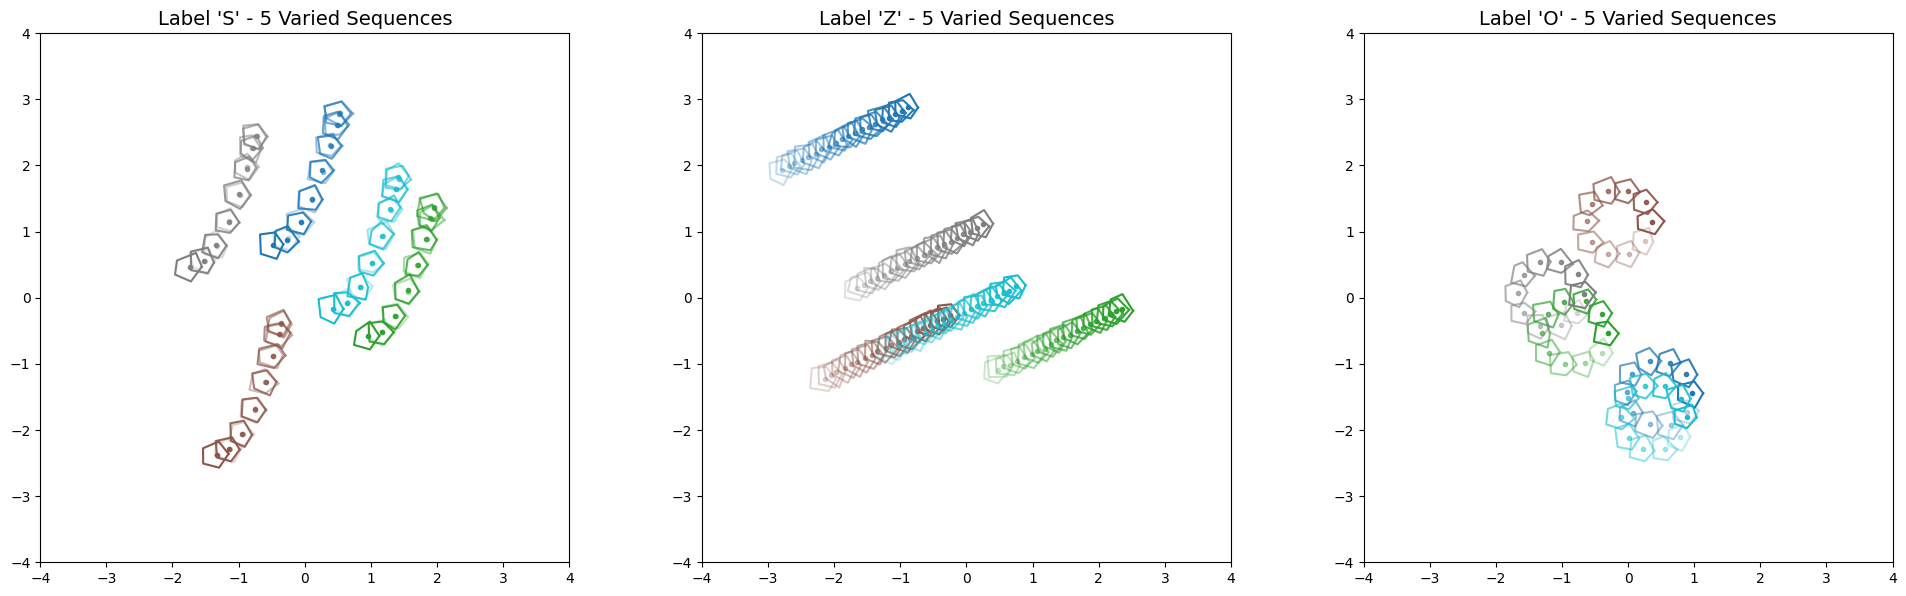

In [15]:
# Jalankan ulang blok kode yang diminta agar menghasilkan DataFrame dan visualisasi sesuai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Konfigurasi
labels = ['S', 'Z', 'O']
timestep_map = {'S': 15, 'Z': 20, 'O': 10}
n_points = 5
sequences_per_label = 5
np.random.seed(42)

# Fungsi bentuk pentagon
def pentagon_shape():
    angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
    return np.array([[np.cos(a), np.sin(a)] for a in angles]) * 0.2

# Fungsi gerakan pusat segilima
def center_trajectory(label, t, T):
    if label == 'S':
        x = np.sin(np.pi * t / T)
        y = -np.cos(2 * np.pi * t / T)
    elif label == 'Z':
        x = 1 - 2 * (t / T)
        y = 1 - (t / T)
    elif label == 'O':
        angle = 2 * np.pi * t / T
        x = 0.5 * np.cos(angle)
        y = 0.5 * np.sin(angle)
    return np.array([x, y])

# Generate posisi awal unik per sequence per label
start_positions = {
    label: [np.array([np.random.uniform(-2, 2), np.random.uniform(-2, 2)]) for _ in range(sequences_per_label)]
    for label in labels
}

# Bangun dataset
all_data = []
sequence_id = 0
for label in labels:
    T = timestep_map[label]
    for seq_num in range(sequences_per_label):
        shift = start_positions[label][seq_num]
        for t in range(T):
            center = center_trajectory(label, t, T) + shift
            shape = pentagon_shape()
            jitter = np.random.normal(0, 0.02, shape.shape)
            coords = shape + jitter + center
            row = {f'X{i}': coords[i, 0] for i in range(n_points)}
            row.update({f'Y{i}': coords[i, 1] for i in range(n_points)})
            row['timestep'] = t
            row['sequence'] = sequence_id
            row['Label'] = label
            all_data.append(row)
        sequence_id += 1

df_varied_start = pd.DataFrame(all_data)

# Visualisasi semua 5 sequence per label
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for idx, label in enumerate(labels):
    ax = axs[idx]
    df_label = df_varied_start[df_varied_start['Label'] == label]
    sequences = sorted(df_label['sequence'].unique())
    cmap = cm.get_cmap('tab10', 5)

    for i, seq_id in enumerate(sequences):
        seq_df = df_label[df_label['sequence'] == seq_id]
        timesteps = sorted(seq_df['timestep'].unique())
        T = len(timesteps)
        for t_idx, t in enumerate(timesteps):
            frame = seq_df[seq_df['timestep'] == t]
            x = [frame[f'X{j}'].values[0] for j in range(n_points)] + [frame[f'X0'].values[0]]
            y = [frame[f'Y{j}'].values[0] for j in range(n_points)] + [frame[f'Y0'].values[0]]
            alpha = 1.0 - (t_idx / T) * 0.8
            ax.plot(x, y, color=cmap(i), alpha=alpha)
            ax.plot(np.mean(x), np.mean(y), 'o', color=cmap(i), alpha=alpha, markersize=3)

    ax.set_title(f"Label '{label}' - 5 Varied Sequences", fontsize=14)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [42]:
# === Full Program: Gesture Prediction with MLP and Conditional LSTM Integration ===

import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import tensorflow as tf
import threading
import time
import pickle
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# === Output Lists ===
output_mlp = ['cepat1','paham1','tidak1','lihat1','menang1','z','a','i','k']
output_mlp2 = ['cepat2','paham2','tidak1','lihat2','menang2','z','10_2','j2','k']
output_lstm = ['cepat','paham','tidak','lihat','menang','z','10','j','kita']

# === Utility Functions ===
def scale_points(points, new_x_max):
    x_max_original = np.max(points[:, 0])
    scale = new_x_max / x_max_original
    transformed_points = points * scale
    return transformed_points[:, 0], transformed_points[:, 1]

def normalisasi(data):
    return data - np.min(data)

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)
    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

# === Load Models and Label Maps ===
with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)

with open('csv/label map/static.pkl', 'rb') as f:
    label_map_static = pickle.load(f)

model_dynamic = tf.keras.models.load_model(
    "model/dinamic/1.h5",
    
)
model_static = tf.keras.models.load_model("model/static/model_1.h5")

frame_count = model_dynamic.input_shape[1]
feature_per_frame = model_dynamic.input_shape[2]

cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
cols_Z = [5,8,12,20]
cols_RX = [4,6,8,10,12,16,19,20]
cols_RY = [4,6,8,10,12,16,19,20]
column_numbersY =sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbersX =sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
column_numbersZ=[2,4]
titik_stabil = [4,8,12,16,20] 
# === Shared Variables ===
pred_output = ""
start = 0
hasil_akhir = None
pose_awal_terdeteksi = False
pose_akhir_terdeteksi = False
array_spatial = []
p1 = p2 = None
pose_awal_waktu = 0
# Setup untuk MediaPipe Hand Detector
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)
mlp_active = True
same = False
lock_output = threading.Lock()
prev_pred = ''
# === Video Thread ===
class VideoCaptureThread:
    def __init__(self, src=0):
        self.cap = cv2.VideoCapture(0)
        self.ret, self.frame = self.cap.read()
        self.running = True
        self.lock = threading.Lock()
        thread = threading.Thread(target=self.update, daemon=True)
        thread.start()

    def update(self):
        while self.running:
            ret, frame = self.cap.read()
            if ret:
                with self.lock:
                    self.ret = ret
                    self.frame = frame

    def read(self):
        with self.lock:
            return self.ret, self.frame.copy()

    def release(self):
        self.running = False
        self.cap.release()

def static_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial, hasil_akhir, mlp_active
    global prev_pred,start
    num_hands=1
    prev_points = None
    stable_frames_counter = 0
    stable_frames_required = 3 
    stability_threshold = 0.02      
    nowX, nowY = 0, 0

    while vc.running:
        ret, frame = vc.read()
        if not ret:
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        if result.hand_landmarks:
            hand = result.hand_landmarks[0]
            nilai_X = np.array([lm.x for lm in hand])
            nilai_Y = np.array([lm.y for lm in hand])
            nilai_Z = np.array([lm.z for lm in hand])[column_numbersZ]

            curr_points = np.array([[nilai_X[i], nilai_Y[i]] for i in titik_stabil])

            if prev_points is not None:
                delta = np.linalg.norm(curr_points - prev_points, axis=1)
                mean_delta = np.mean(delta)

                if mean_delta < stability_threshold:
                    stable_frames_counter += 1
                else:
                    stable_frames_counter = 0
            else:
                stable_frames_counter = 0

            prev_points = curr_points.copy()

            if stable_frames_counter >= stable_frames_required:
                # Lanjutkan prediksi jika stabil
                newX = normalisasi(nilai_X)
                newY = normalisasi(nilai_Y)
                newXY = np.column_stack((newX, newY))
                newX, newY = scale_points(newXY, 1)

                fiturX = newX[column_numbersX]
                fiturY = newY[column_numbersY]

                features = np.concatenate((fiturX, fiturY, nilai_Z)).astype(np.float32)
                input_data = np.expand_dims(features, axis=0)

                prediction = model_static.predict(input_data, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction)
                label = label_map_static[predicted_class]

                

                if confidence >= 0.8:
                    # print(float(time.time()-start) )
                   
                    # if prev_pred==label  and float(time.time()-start) > 1:
                    #     pose_awal_terdeteksi = False
                    #     pose_akhir_terdeteksi = False
                    #     mlp_active = True
                    #     pred_output += f'{label}'

                    if label in output_mlp and pose_awal_terdeteksi == False:
                        with lock_output:
                            p1 = output_mlp.index(label)
                            pose_awal_terdeteksi = True
                            mlp_active = False
                            array_spatial = []
                            hasil_akhir = None
                            prev_pred = label
                            print(label)
                            # pred_output = f"{label} ({confidence:.2f}) ..wait"
                            # print(pred_output)
                    
                    elif pose_awal_terdeteksi and label in output_mlp2 :
                        print(label)
                        p2 = output_mlp2.index(label)
                        prev_pred = label
                        if p1 == p2:
                            pose_akhir_terdeteksi = True
                        else:
                            pose_awal_terdeteksi = False
                            pose_akhir_terdeteksi = False
                            mlp_active = True
                    elif pose_awal_terdeteksi and label in output_mlp and label!=prev_pred :
                        pred_output += f'{prev_pred}'
                        
                        p1 = output_mlp.index(label)
                        pose_awal_terdeteksi = True
                        mlp_active = False
                        array_spatial = []
                        hasil_akhir = None
                        prev_pred = label
                        
                    elif label not in output_mlp and label not in output_mlp2 and mlp_active==True:
                        
                        if prev_pred != label:
                            pred_output += f'{label}'
                            prev_pred = label
                            start = time.time()
                        elif prev_pred == label and float(time.time()-start >2):
                            pred_output += f'{label}'
                            prev_pred = label
                            start = time.time()
                    
                    # elif mlp_active:
                    #     pred_output = f"{label} ({confidence:.2f})"
            # else:
            #     print(f"[TIDAK STABIL]")
        else:
            prev_points = None
            stable_frames_counter = 0


# === Dynamic Prediction Thread ===
def dynamic_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial, hasil_akhir, pose_awal_waktu
    X_before = Y_before = None
    
    while vc.running :
        
        ret, frame = vc.read()
        if not ret:
            continue
        if pose_awal_terdeteksi:
            
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
            result = detector.detect(mp_image)

            if result.hand_landmarks and pose_awal_terdeteksi:
                hand = result.hand_landmarks[0]
                nilaiX = np.array([lm.x for lm in hand])
                nilaiY = np.array([lm.y for lm in hand])
                nilaiZ = np.array([lm.z for lm in hand])[cols_Z]

                try:
                    vektorX = nilaiX[cols_RX] - X_before
                    vektorY = nilaiY[cols_RY] - Y_before
                except:
                    vektorX = [0] * len(cols_RX)
                    vektorY = [0] * len(cols_RY)

                X_before = nilaiX[cols_RX]
                Y_before = nilaiY[cols_RY]
                newX = normalisasi(nilaiX)
                newY = normalisasi(nilaiY)
                newXY = np.column_stack((newX, newY) ) 
                newX , newY = scale_points(newXY,1)
                features2 = np.concatenate([
                        np.array(newX)[cols_X],
                        np.array(newY)[cols_Y],
                        np.array(nilaiZ),
                        np.array(vektorX),
                        np.array(vektorY)
                    ])

                
                
                    
                array_spatial.append(features2)
                # print(len(array_spatial))
                # if pose_akhir_terdeteksi:
                #     pred_output = f"{output_mlp[p1]} (gabungan gagal)"
                #     pose_awal_terdeteksi = False
                #     array_spatial = []
                if len(array_spatial)>45 and pose_akhir_terdeteksi==False:
                    pose_awal_terdeteksi = False
                    array_spatial = []


                if pose_akhir_terdeteksi and len(array_spatial) >= 25:
                    print('BEKERJA')
                    trimmed = trim_sequence(array_spatial, 25)
                    input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
                    prediction = model_dynamic.predict(input_data, verbose=0)
                    p_lstm = np.argmax(prediction)
                
                    if label_map[p_lstm] in output_lstm:
                        if p1 + output_lstm.index(label_map[p_lstm]) + p2 == p1 * 3:
                            hasil_akhir = output_lstm.index(label_map[p_lstm])
                            pred_output += f" {label_map[p_lstm]}"
                            mlp_active = True
                            
                        # else:
                        #     pred_output = f"{output_mlp[p1]} (gabungan gagal)"
                    
                    pose_awal_terdeteksi = False
                    pose_akhir_terdeteksi = False
                    array_spatial = []

# === Main Execution ===
vc = VideoCaptureThread()
threading.Thread(target=static_prediction_thread, args=(vc,), daemon=True).start()
threading.Thread(target=dynamic_prediction_thread, args=(vc,), daemon=True).start()

time.sleep(1)

while True:
    ret, frame = vc.read()
    if not ret:
        break

    with lock_output:
        pred_output = pred_output

    cv2.putText(frame, f"Output: {pred_output}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 100, 255), 2)

    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()

I0000 00:00:1747036162.265933   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747036162.268547  183939 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747036162.298686  183942 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747036162.313315  183949 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


menang1
menang2
menang2
BEKERJA
menang2
menang2
lihat1
lihat2
BEKERJA
z
z
BEKERJA
z


In [3]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import tensorflow as tf
import threading
import time
import pickle

# === Output Lists ===
output_mlp = ['cepat1','paham1','tidak1','lihat1','menang1','z','a','i','k']
output_mlp2 = ['cepat2','paham2','tidak1','lihat2','menang2','z','10_2','j2','k']
output_lstm = ['cepat','paham','tidak','lihat','menang','z','10','j','kita']

# === Utility Functions ===
def scale_points(points, new_x_max):
    x_max_original = np.max(points[:, 0])
    scale = new_x_max / x_max_original if x_max_original != 0 else 1
    transformed_points = points * scale
    return transformed_points[:, 0], transformed_points[:, 1]

def normalisasi(data):
    return data - np.min(data)

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)
    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

# === Load Models and Label Maps ===
with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)
with open('csv/label map/static.pkl', 'rb') as f:
    label_map_static = pickle.load(f)

model_dynamic = tf.keras.models.load_model("model/dinamic/1.h5")
model_static = tf.keras.models.load_model("model/static/model_1.h5")

frame_count = model_dynamic.input_shape[1]
feature_per_frame = model_dynamic.input_shape[2]

# === Kolom untuk fitur ===
cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
cols_Z = [5,8,12,20]
cols_RX = [4,6,8,10,12,16,19,20]
cols_RY = [4,6,8,10,12,16,19,20]
column_numbersY =sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbersX =sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
column_numbersZ=[2,4]
titik_stabil = [4,8,12,16,20] 

# === Shared Variables ===
pred_output = ""
start = 0
hasil_akhir = None
pose_awal_terdeteksi = False
pose_akhir_terdeteksi = False
array_spatial = []
p1 = p2 = None
pose_awal_waktu = 0
mlp_active = True
lock_output = threading.Lock()
prev_pred = ''

# === MediaPipe Setup ===
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

# === VideoCapture with Auto FPS ===
class VideoCaptureThread:
    def __init__(self, src='video2/test/2.mp4'):  # ubah ke 0 jika ingin webcam
        self.cap = cv2.VideoCapture(src)
        self.fps = self.cap.get(cv2.CAP_PROP_FPS)
        self.frame_delay = int(1000 / self.fps) if self.fps > 0 else 33
        self.ret, self.frame = self.cap.read()
        self.running = True
        self.lock = threading.Lock()
        thread = threading.Thread(target=self.update, daemon=True)
        thread.start()

    def update(self):
        while self.running:
            ret, frame = self.cap.read()
            if not ret:
                self.cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # replay
                continue
            with self.lock:
                self.ret = ret
                self.frame = frame

    def read(self):
        with self.lock:
            return self.ret, self.frame.copy()

    def release(self):
        self.running = False
        self.cap.release()

# === Static Prediction Thread ===
def static_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial, hasil_akhir, mlp_active, prev_pred, start
    prev_points = None
    stable_frames_counter = 0
    stable_frames_required = 3 
    stability_threshold = 0.015

    while vc.running:
        ret, frame = vc.read()
        if not ret: continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        if result.hand_landmarks:
            hand = result.hand_landmarks[0]
            nilai_X = np.array([lm.x for lm in hand])
            nilai_Y = np.array([lm.y for lm in hand])
            nilai_Z = np.array([lm.z for lm in hand])[column_numbersZ]

            curr_points = np.array([[nilai_X[i], nilai_Y[i]] for i in titik_stabil])
            if prev_points is not None:
                delta = np.linalg.norm(curr_points - prev_points, axis=1)
                mean_delta = np.mean(delta)
                stable_frames_counter = stable_frames_counter + 1 if mean_delta < stability_threshold else 0
            else:
                stable_frames_counter = 0
            prev_points = curr_points.copy()

            if stable_frames_counter >= stable_frames_required:
                newX = normalisasi(nilai_X)
                newY = normalisasi(nilai_Y)
                newXY = np.column_stack((newX, newY))
                newX, newY = scale_points(newXY, 1)
                fiturX = newX[column_numbersX]
                fiturY = newY[column_numbersY]
                features = np.concatenate((fiturX, fiturY, nilai_Z)).astype(np.float32)
                input_data = np.expand_dims(features, axis=0)

                prediction = model_static.predict(input_data, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction)
                label = label_map_static[predicted_class]

                if confidence >= 0.92:
                    with lock_output:
                        if label in output_mlp and not pose_awal_terdeteksi:
                            p1 = output_mlp.index(label)
                            pose_awal_terdeteksi = True
                            mlp_active = False
                            array_spatial = []
                            hasil_akhir = None
                            prev_pred = label
                        elif pose_awal_terdeteksi and label in output_mlp2:
                            p2 = output_mlp2.index(label)
                            prev_pred = label
                            if p1 == p2:
                                pose_akhir_terdeteksi = True
                            else:
                                pose_awal_terdeteksi = False
                                pose_akhir_terdeteksi = False
                                mlp_active = True
                        elif pose_awal_terdeteksi and label in output_mlp and label != prev_pred:
                            pred_output += f'{prev_pred}'
                            p1 = output_mlp.index(label)
                            pose_awal_terdeteksi = True
                            mlp_active = False
                            array_spatial = []
                            hasil_akhir = None
                            prev_pred = label
                        elif label not in output_mlp and label not in output_mlp2 and mlp_active:
                            if prev_pred != label or time.time() - start > 2:
                                pred_output += f'{label}'
                                prev_pred = label
                                start = time.time()
        else:
            prev_points = None
            stable_frames_counter = 0

# === Dynamic Prediction Thread ===
def dynamic_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial, hasil_akhir
    X_before = Y_before = None
    
    while vc.running:
        ret, frame = vc.read()
        if not ret: continue
        if pose_awal_terdeteksi:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
            result = detector.detect(mp_image)

            if result.hand_landmarks:
                hand = result.hand_landmarks[0]
                nilaiX = np.array([lm.x for lm in hand])
                nilaiY = np.array([lm.y for lm in hand])
                nilaiZ = np.array([lm.z for lm in hand])[cols_Z]

                try:
                    vektorX = nilaiX[cols_RX] - X_before
                    vektorY = nilaiY[cols_RY] - Y_before
                except:
                    vektorX = [0] * len(cols_RX)
                    vektorY = [0] * len(cols_RY)

                X_before = nilaiX[cols_RX]
                Y_before = nilaiY[cols_RY]
                newX = normalisasi(nilaiX)
                newY = normalisasi(nilaiY)
                newXY = np.column_stack((newX, newY)) 
                newX , newY = scale_points(newXY,10)
                features2 = np.concatenate([
                    np.array(newX)[cols_X],
                    np.array(newY)[cols_Y],
                    np.array(nilaiZ),
                    np.array(vektorX),
                    np.array(vektorY)
                ])
                array_spatial.append(features2)

                if len(array_spatial) > 45 and not pose_akhir_terdeteksi:
                    pose_awal_terdeteksi = False
                    array_spatial = []

                if pose_akhir_terdeteksi and len(array_spatial) >= 25:
                    trimmed = trim_sequence(array_spatial, 25)
                    input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
                    prediction = model_dynamic.predict(input_data, verbose=0)
                    p_lstm = np.argmax(prediction)
                    label_lstm = label_map[p_lstm]

                    if label_lstm in output_lstm and (p1 + output_lstm.index(label_lstm) + p2 == p1 * 3):
                        with lock_output:
                            hasil_akhir = output_lstm.index(label_lstm)
                            pred_output += f" {label_lstm}"
                            mlp_active = True

                    pose_awal_terdeteksi = False
                    pose_akhir_terdeteksi = False
                    array_spatial = []

# === MAIN ===
vc = VideoCaptureThread()  # default: load dari mp4. Ganti ke 0 jika ingin webcam
threading.Thread(target=static_prediction_thread, args=(vc,), daemon=True).start()
threading.Thread(target=dynamic_prediction_thread, args=(vc,), daemon=True).start()

while True:
    ret, frame = vc.read()
    if not ret:
        break
    with lock_output:
        output = pred_output

    cv2.putText(frame, f"Output: {output}", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 100, 255), 2)
    cv2.imshow("Gesture Recognition", frame)

    if cv2.waitKey(vc.frame_delay) & 0xFF == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()


I0000 00:00:1747034144.872813   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747034144.876274   75506 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747034144.936895   75507 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747034144.968912   75521 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [67]:
a='a'
if not a:
    print('k')

In [75]:
a = 'k'
mydict = {1:'k',2:'f'}
a in label_map_static.values()

True

In [78]:
act = False
if not act:
    print('a')

a


In [80]:
output_mlp.endswith('1')

AttributeError: 'list' object has no attribute 'endswith'

In [81]:

hasil = [item for item in output_mlp if item.endswith('1')]
hasil

['cepat1', 'paham1', 'tidak1', 'lihat1', 'menang1']

IMPLEMENTATION FROM DEEPSEEK


I0000 00:00:1747044529.346866   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747044529.348330  220533 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747044529.357031  220538 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747044529.364308  220548 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
mbapeeee
mbapeeee
hello
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
mbapeeee
mbapeeee
hello
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
hello
mbapeeee
mbapeeee
mbapeeee


In [70]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import tensorflow as tf
import threading
import time
import pickle

# === Output Lists ===
output_mlp = ['cepat1','paham1','tidak1','lihat1','menang1','z','a','i','k']
output_mlp2 = ['cepat2','paham2','tidak1','lihat2','menang2','z','10_2','j2','k']
output_lstm = ['cepat','paham','tidak','lihat','menang','z','10','j','kita']

# Create mappings between gesture types
static_to_dynamic_start = {v:i for i,v in enumerate(output_mlp)}
static_to_dynamic_end = {v:i for i,v in enumerate(output_mlp2)}
dynamic_to_final = {i:output_lstm[i] for i in range(len(output_lstm))}

# Gestures that appear in both static and dynamic lists
ambigious_gestures = set(output_mlp) & set(output_mlp2)  # e.g., 'k'

# === Utility Functions ===
def scale_points(points, new_x_max):
    x_max_original = np.max(points[:, 0])
    scale = new_x_max / x_max_original
    transformed_points = points * scale
    return transformed_points[:, 0], transformed_points[:, 1]

def normalisasi(data):
    return data - np.min(data)

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)
    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

# === Load Models and Label Maps ===
with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)

with open('csv/label map/static.pkl', 'rb') as f:
    label_map_static = pickle.load(f)

model_dynamic = tf.keras.models.load_model("model/dinamic/1.h5")
model_static = tf.keras.models.load_model("model/static/model_1.h5")

# Model input shapes
frame_count = model_dynamic.input_shape[1]
feature_per_frame = model_dynamic.input_shape[2]

# Feature selection columns
cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
cols_Z = [5,8,12,20]
cols_RX = [4,6,8,10,12,16,19,20]
cols_RY = [4,6,8,10,12,16,19,20]
column_numbersY = sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbersX = sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
column_numbersZ = [2,4]
titik_stabil = [4,8,12,16,20] 

# === Shared Variables ===
pred_phrase = ""  # Accumulated phrase output
current_gesture = ""  # Current detected gesture
sequence_frames = []  # Stores frames for dynamic sequences
sequence_start = None  # Index of start pose for current sequence
sequence_active = False  # Whether we're in a dynamic sequence
last_gesture_time = 0  # Time of last gesture detection
gesture_cooldown = 0.5  # Seconds to wait between gestures

# Thread locks
lock_phrase = threading.Lock()
lock_sequence = threading.Lock()

# Setup MediaPipe Hand Detector
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

class VideoCaptureThread:
    def __init__(self, src=1):
        self.cap = cv2.VideoCapture(src)
        self.ret, self.frame = self.cap.read()
        self.running = True
        self.lock = threading.Lock()
        thread = threading.Thread(target=self.update, daemon=True)
        thread.start()

    def update(self):
        while self.running:
            ret, frame = self.cap.read()
            if ret:
                with self.lock:
                    self.ret = ret
                    self.frame = frame

    def read(self):
        with self.lock:
            return self.ret, self.frame.copy() if self.frame is not None else (False, None)

    def release(self):
        self.running = False
        if self.cap.isOpened():
            self.cap.release()

def process_static_gesture(label, confidence):
    global pred_phrase, current_gesture, sequence_active, sequence_start, sequence_frames, last_gesture_time
    
    current_time = time.time()
    
    # Skip if in cooldown period
    if current_time - last_gesture_time < gesture_cooldown:
        return
    
    with lock_sequence:
        # Handle ambigious gestures (like 'k') - always treat as static
        if label in ambigious_gestures:
            with lock_phrase:
                if not pred_phrase.endswith(label):
                    pred_phrase += f" {label}" if pred_phrase else label
                    current_gesture = label
                    last_gesture_time = current_time
            return
        
        # Handle potential start of dynamic sequence
        if label in static_to_dynamic_start and not sequence_active:
            sequence_start = static_to_dynamic_start[label]
            sequence_active = True
            sequence_frames = []
            current_gesture = f"{label} (start)"
            last_gesture_time = current_time
            return
        
        # Handle potential end of dynamic sequence
        if label in static_to_dynamic_end and sequence_active:
            end_index = static_to_dynamic_end[label]
            
            # Only process if start and end indices match
            if sequence_start == end_index and len(sequence_frames) >= 25:
                process_dynamic_sequence(sequence_start, end_index)
            else:
                # Cancel sequence if invalid
                current_gesture = f"{output_mlp[sequence_start]} (canceled)"
            
            sequence_active = False
            sequence_start = None
            sequence_frames = []
            last_gesture_time = current_time
            return
        
        # Regular static gesture (not part of any dynamic sequence)
        if not sequence_active and label not in static_to_dynamic_start and label not in static_to_dynamic_end:
            with lock_phrase:
                if not pred_phrase.endswith(label):
                    pred_phrase += f" {label}" if pred_phrase else label
                    current_gesture = label
                    last_gesture_time = current_time

def process_dynamic_sequence(start_index, end_index):
    global pred_phrase, current_gesture
    
    try:
        trimmed = trim_sequence(sequence_frames, 25)
        input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
        prediction = model_dynamic.predict(input_data, verbose=0)
        predicted_class = np.argmax(prediction)
        lstm_label = label_map[predicted_class]
        
        if lstm_label in output_lstm:
            final_label = dynamic_to_final[output_lstm.index(lstm_label)]
            with lock_phrase:
                pred_phrase += f" {final_label}" if pred_phrase else final_label
                current_gesture = final_label
    except Exception as e:
        print(f"Dynamic prediction error: {e}")
        current_gesture = f"{output_mlp[start_index]} (error)"

def static_prediction_thread(vc):
    global sequence_frames
    
    prev_points = None
    stable_frames = 0
    stable_threshold = 3
    stability_margin = 0.02
    
    while vc.running:
        ret, frame = vc.read()
        if not ret:
            continue
        
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)
        
        if not result.hand_landmarks:
            prev_points = None
            stable_frames = 0
            continue
        
        hand = result.hand_landmarks[0]
        points = np.array([[lm.x, lm.y] for lm in hand])
        curr_points = points[titik_stabil]
        
        # Check stability
        if prev_points is not None:
            movement = np.mean(np.linalg.norm(curr_points - prev_points, axis=1))
            if movement < stability_margin:
                stable_frames += 1
            else:
                stable_frames = 0
        prev_points = curr_points
        
        if stable_frames >= stable_threshold:
            # Extract features
            nilai_X = np.array([lm.x for lm in hand])
            nilai_Y = np.array([lm.y for lm in hand])
            nilai_Z = np.array([lm.z for lm in hand])[column_numbersZ]
            
            newX = normalisasi(nilai_X)
            newY = normalisasi(nilai_Y)
            newXY = np.column_stack((newX, newY))
            newX, newY = scale_points(newXY, 1)
            
            fiturX = newX[column_numbersX]
            fiturY = newY[column_numbersY]
            features = np.concatenate((fiturX, fiturY, nilai_Z)).astype(np.float32)
            
            # Predict
            prediction = model_static.predict(np.expand_dims(features, axis=0), verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)
            label = label_map_static[predicted_class]
            
            if confidence >= 0.8:
                process_static_gesture(label, confidence)
        
        # Reset stability if hand is lost
        else:
            prev_points = None
            stable_frames = 0

def dynamic_prediction_thread(vc):
    global sequence_frames
    
    X_before = Y_before = None
    frame_interval = 0.033  # ~30fps
    last_frame_time = 0
    
    while vc.running:
        current_time = time.time()
        if current_time - last_frame_time < frame_interval:
            time.sleep(0.001)
            continue
        last_frame_time = current_time
        
        with lock_sequence:
            if not sequence_active:
                continue
        
        ret, frame = vc.read()
        if not ret:
            continue
        
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)
        
        if not result.hand_landmarks:
            continue
        
        hand = result.hand_landmarks[0]
        nilaiX = np.array([lm.x for lm in hand])
        nilaiY = np.array([lm.y for lm in hand])
        nilaiZ = np.array([lm.z for lm in hand])[cols_Z]
        
        # Calculate motion vectors
        try:
            vektorX = nilaiX[cols_RX] - X_before
            vektorY = nilaiY[cols_RY] - Y_before
        except:
            vektorX = np.zeros(len(cols_RX))
            vektorY = np.zeros(len(cols_RY))
        
        X_before = nilaiX[cols_RX]
        Y_before = nilaiY[cols_RY]
        
        # Process features
        newX = normalisasi(nilaiX)
        newY = normalisasi(nilaiY)
        newXY = np.column_stack((newX, newY))
        newX, newY = scale_points(newXY, 1)
        
        features = np.concatenate([
            np.array(newX)[cols_X],
            np.array(newY)[cols_Y],
            np.array(nilaiZ),
            np.array(vektorX),
            np.array(vektorY)
        ])
        
        with lock_sequence:
            if sequence_active:
                sequence_frames.append(features)
                
                # Check for timeout (2 seconds)
                if current_time - last_gesture_time > 2.0:
                    current_gesture = f"{output_mlp[sequence_start]} (timeout)"
                    sequence_active = False
                    sequence_start = None
                    sequence_frames = []

# === Main Execution ===
vc = VideoCaptureThread()
threading.Thread(target=static_prediction_thread, args=(vc,), daemon=True).start()
threading.Thread(target=dynamic_prediction_thread, args=(vc,), daemon=True).start()

time.sleep(1)  # Initialize threads

while True:
    ret, frame = vc.read()
    if not ret:
        break
    
    # Display output
    with lock_phrase:
        phrase_text = pred_phrase
        gesture_text = current_gesture
    
    cv2.putText(frame, f"Phrase: {phrase_text}", (10, 30), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200, 100, 255), 2)
    cv2.putText(frame, f"Current: {gesture_text}", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (200, 255, 100), 2)
    
    # Display mode information
    with lock_sequence:
        mode = "DYNAMIC" if sequence_active else "STATIC"
        frames = len(sequence_frames) if sequence_active else 0
    cv2.putText(frame, f"Mode: {mode} | Frames: {frames}", (10, 90), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (100, 255, 255), 1)
    
    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()

I0000 00:00:1747041191.023831   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747041191.025898  208119 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747041191.045557  208123 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747041191.057726  208134 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
Exception in thread Thread-211 (dynamic_prediction_thread):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/lalo_salamanca/Projects/p1_project_LSTM/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/usr/

In [9]:
k='p'
k+='i'
k

'pi'

In [1]:
import threading
import time

data = []
lock = threading.Lock()

def tambah_data():
    for i in range(5):
        time.sleep(0.5)
        with lock:
            data.append(i)
            print(f"[Thread] Menambahkan: {i}")

# Jalankan thread (tanpa join)
threading.Thread(target=tambah_data, daemon=True).start()

# Tunggu sementara (simulasi program masih hidup seperti GUI loop)
time.sleep(3)

# Akses hasil akhir di luar thread
with lock:
    print("Hasil akhir:", data)


[Thread] Menambahkan: 0
[Thread] Menambahkan: 1
[Thread] Menambahkan: 2
[Thread] Menambahkan: 3
[Thread] Menambahkan: 4
Hasil akhir: [0, 1, 2, 3, 4]


In [8]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
import tensorflow as tf
import threading
import time
import pickle
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# === Output Lists ===
output_mlp = ['cepat1','paham1','tidak1','lihat1','menang1','z','a','i','k']
output_mlp2 = ['cepat2','paham2','tidak1','lihat2','menang2','z','10_2','j2','k']
output_lstm = ['cepat','paham','tidak','lihat','menang','z','10','j','kita']
pose_dinamic1 = [item for item in output_mlp if item.endswith('1')]

# === Utility Functions ===
def scale_points(points, new_x_max):
    x_max_original = np.max(points[:, 0])
    scale = new_x_max / x_max_original
    transformed_points = points * scale
    return transformed_points[:, 0], transformed_points[:, 1]

def normalisasi(data):
    return data - np.min(data)

def trim_sequence(seq, target_len=25):
    if len(seq) <= target_len:
        return list(seq)
    keep_first = seq[0]
    keep_last = seq[-1]
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

def cancel_sequence(reason=""):
    global pose_awal_terdeteksi, pose_akhir_terdeteksi, sequence_active, array_spatial
    global current_sequence_type, sequence_start_gesture
    with lock_state:
        pose_awal_terdeteksi = False
        pose_akhir_terdeteksi = False
        sequence_active = False
        array_spatial = []
        current_sequence_type = None
        sequence_start_gesture = None
    with lock_output:
        if sequence_start_gesture:
            current_output = f"{sequence_start_gesture} (canceled: {reason})"

def process_sequence():
    global pred_output, current_output, array_spatial
    global pose_awal_terdeteksi, pose_akhir_terdeteksi, sequence_active
    global current_sequence_type, sequence_start_gesture
    
    try:
        if current_sequence_type == 'lstm' and len(array_spatial) >= 25:
            trimmed = trim_sequence(array_spatial, 25)
            input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
            prediction = model_dynamic.predict(input_data, verbose=0)
            p_lstm = np.argmax(prediction)
            lstm_label = label_map[p_lstm]
            
            if lstm_label in output_lstm and p1 == output_lstm.index(lstm_label):
                with lock_output:
                    pred_output += f" {lstm_label}"
                    current_output = lstm_label
            else:
                with lock_output:
                    current_output = f"{output_mlp[p1]} (no match)"
                    
        elif current_sequence_type == 'mlp':
            with lock_output:
                pred_output += f" {output_mlp[p1]}"
                current_output = output_mlp[p1]
                
    except Exception as e:
        print(f"Sequence processing error: {e}")
        with lock_output:
            current_output = f"{output_mlp[p1]} (error)"
            
    finally:
        with lock_state:
            pose_awal_terdeteksi = False
            pose_akhir_terdeteksi = False
            sequence_active = False
            array_spatial = []
            current_sequence_type = None
            sequence_start_gesture = None

# === Load Models and Label Maps ===
with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)

with open('csv/label map/static.pkl', 'rb') as f:
    label_map_static = pickle.load(f)

model_dynamic = tf.keras.models.load_model("model/dinamic/1.h5")
model_static = tf.keras.models.load_model("model/static/model_1.h5")

frame_count = model_dynamic.input_shape[1]
feature_per_frame = model_dynamic.input_shape[2]

cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
cols_Z = [5,8,12,20]
cols_RX = [4,6,8,10,12,16,19,20]
cols_RY = [4,6,8,10,12,16,19,20]
column_numbersY = sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbersX = sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
column_numbersZ = [2,4]
titik_stabil = [4,8,12,16,20] 

# === Shared Variables ===
pred_output = ""
current_output = ""
start = 0
hasil_akhir = None
pose_awal_terdeteksi = False
pose_akhir_terdeteksi = False
array_spatial = []
p1 = p2 = None
pose_awal_waktu = 0
sequence_active = False
current_sequence_type = None  # 'mlp' or 'lstm'
sequence_start_gesture = None
sequence_start_time = 0
last_static_time = 0
static_cooldown = 1.0

# Setup untuk MediaPipe Hand Detector
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=1)
detector = vision.HandLandmarker.create_from_options(options)

lock_output = threading.Lock()
lock_state = threading.Lock()

# === Video Thread ===
class VideoCaptureThread:
    def __init__(self, src=1):
        self.cap = cv2.VideoCapture(src)
        self.ret, self.frame = self.cap.read()
        self.running = True
        self.lock = threading.Lock()
        thread = threading.Thread(target=self.update, daemon=True)
        thread.start()

    def update(self):
        while self.running:
            ret, frame = self.cap.read()
            if ret:
                with self.lock:
                    self.ret = ret
                    self.frame = frame

    def read(self):
        with self.lock:
            return self.ret, self.frame.copy() if self.frame is not None else (False, None)

    def release(self):
        self.running = False
        if self.cap.isOpened():
            self.cap.release()

def static_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial
    global hasil_akhir, sequence_active, last_static_time, current_output
    global current_sequence_type, sequence_start_gesture, sequence_start_time
    
    prev_points = None
    stable_frames_counter = 0
    stable_frames_required = 3 
    stability_threshold = 0.02      
    last_prediction = None
    last_prediction_time = 0
    prediction_cooldown = 1.0
    
    while vc.running:
        ret, frame = vc.read()
        if not ret:
            continue

        current_time = time.time()
        
        # Skip processing if we're in a dynamic sequence
        if sequence_active and (current_time - sequence_start_time < static_cooldown):
            continue
            
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        if result.hand_landmarks:
            hand = result.hand_landmarks[0]
            nilai_X = np.array([lm.x for lm in hand])
            nilai_Y = np.array([lm.y for lm in hand])
            nilai_Z = np.array([lm.z for lm in hand])[column_numbersZ]

            curr_points = np.array([[nilai_X[i], nilai_Y[i]] for i in titik_stabil])

            if prev_points is not None:
                delta = np.linalg.norm(curr_points - prev_points, axis=1)
                mean_delta = np.mean(delta)

                if mean_delta < stability_threshold:
                    stable_frames_counter += 1
                else:
                    stable_frames_counter = 0
            else:
                stable_frames_counter = 0

            prev_points = curr_points.copy()

            if stable_frames_counter >= stable_frames_required:
                newX = normalisasi(nilai_X)
                newY = normalisasi(nilai_Y)
                newXY = np.column_stack((newX, newY))
                newX, newY = scale_points(newXY, 1)

                fiturX = newX[column_numbersX]
                fiturY = newY[column_numbersY]

                features = np.concatenate((fiturX, fiturY, nilai_Z)).astype(np.float32)
                input_data = np.expand_dims(features, axis=0)

                prediction = model_static.predict(input_data, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction)
                label = label_map_static[predicted_class]

                if confidence >= 0.8 and (current_time - last_prediction_time > prediction_cooldown or label != last_prediction):
                    last_prediction_time = current_time
                    last_prediction = label
                    
                    # Check gesture type
                    is_sequence_starter = label in output_mlp
                    is_sequence_ender = label in output_mlp2
                    is_regular_static = not (is_sequence_starter or is_sequence_ender)
                    
                    if is_regular_static:
                        # Handle regular static gesture
                        with lock_output:
                            pred_output += label
                            current_output = label
                        last_static_time = current_time
                        
                    elif is_sequence_starter and not sequence_active:
                        # Start new sequence
                        with lock_state:
                            p1 = output_mlp.index(label)
                            pose_awal_terdeteksi = True
                            array_spatial = []
                            sequence_active = True
                            sequence_start_time = current_time
                            sequence_start_gesture = label
                            current_sequence_type = 'mlp' if label in pose_dinamic1 else 'lstm'
                        with lock_output:
                            current_output = f"{label} (start)"
                            
                    elif is_sequence_ender and sequence_active:
                        # Check if this ends the current sequence
                        p2 = output_mlp2.index(label)
                        matching_sequence = (p1 == p2)
                        
                        if matching_sequence:
                            pose_akhir_terdeteksi = True
                            with lock_output:
                                current_output = f"{output_mlp[p1]} (end)"
                            process_sequence()
                        else:
                            cancel_sequence(f"Mismatched end gesture: {label}")
        else:
            prev_points = None
            stable_frames_counter = 0
            with lock_state:
                if sequence_active and (current_time - sequence_start_time > 2.0):
                    cancel_sequence("Timeout")

def dynamic_prediction_thread(vc):
    global pred_output, pose_awal_terdeteksi, pose_akhir_terdeteksi, p1, p2, array_spatial
    global hasil_akhir, sequence_active, current_output
    
    X_before = Y_before = None
    last_frame_time = time.time()
    min_frame_interval = 0.033
    
    while vc.running:
        current_time = time.time()
        if current_time - last_frame_time < min_frame_interval:
            time.sleep(0.001)
            continue
        
        last_frame_time = current_time
        
        with lock_state:
            if not pose_awal_terdeteksi or not sequence_active:
                continue
        
        ret, frame = vc.read()
        if not ret:
            continue

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
        result = detector.detect(mp_image)

        if result.hand_landmarks:
            hand = result.hand_landmarks[0]
            nilaiX = np.array([lm.x for lm in hand])
            nilaiY = np.array([lm.y for lm in hand])
            nilaiZ = np.array([lm.z for lm in hand])[cols_Z]

            try:
                vektorX = nilaiX[cols_RX] - X_before
                vektorY = nilaiY[cols_RY] - Y_before
            except:
                vektorX = [0] * len(cols_RX)
                vektorY = [0] * len(cols_RY)

            X_before = nilaiX[cols_RX]
            Y_before = nilaiY[cols_RY]
            newX = normalisasi(nilaiX)
            newY = normalisasi(nilaiY)
            newXY = np.column_stack((newX, newY))
            newX, newY = scale_points(newXY, 1)
            
            features2 = np.concatenate([
                np.array(newX)[cols_X],
                np.array(newY)[cols_Y],
                np.array(nilaiZ),
                np.array(vektorX),
                np.array(vektorY)
            ])

            with lock_state:
                if pose_awal_terdeteksi and sequence_active:
                    array_spatial.append(features2)
                    
                    # Check for sequence timeout
                    if len(array_spatial) > 60:
                        cancel_sequence("Frame limit exceeded")

# === Main Execution ===
vc = VideoCaptureThread()
threading.Thread(target=static_prediction_thread, args=(vc,), daemon=True).start()
threading.Thread(target=dynamic_prediction_thread, args=(vc,), daemon=True).start()

time.sleep(1)

while True:
    ret, frame = vc.read()
    if not ret:
        break

    with lock_output:
        display_text = current_output if current_output else pred_output
    
    cv2.putText(frame, f"Output: {display_text}", (10, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (200, 100, 255), 2)
    
    # Show state information
    state_info = [
        f"State: {'MLP' if not sequence_active else 'LSTM'}",
        f"Sequence: {'Active' if sequence_active else 'Inactive'}",
        f"Pose Start: {'Yes' if pose_awal_terdeteksi else 'No'}",
        f"Pose End: {'Yes' if pose_akhir_terdeteksi else 'No'}",
        f"Frames: {len(array_spatial)}",
        f"Current Type: {current_sequence_type}"
    ]
    
    for i, info in enumerate(state_info):
        cv2.putText(frame, info, (10, 90 + i*25), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (100, 0, 100), 1)

    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vc.release()
cv2.destroyAllWindows()

I0000 00:00:1747061569.443531   10138 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747061569.445886   20722 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747061569.465634   20723 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747061569.475461   20736 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [61]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
from collections import deque
import tensorflow as tf
import pickle
import time
import threading

# ==================== FUNGSI PENDUKUNG ====================

def normalisasi2(data):
    return [(d - data[0]) for d in data[1:]]

def scale_points(points, new_x_max):
    x_max_original = np.max(points[:, 0])
    scale = new_x_max / x_max_original if x_max_original != 0 else 1
    transformed_points = points * scale
    return transformed_points[:, 0], transformed_points[:, 1]

def trim_sequence(seq, target_len=20):
    if len(seq) <= target_len:
        return list(seq)
    keep_first, keep_last = seq[0], seq[-1]
    middle = list(seq)[1:-1]
    step = len(middle) / (target_len - 2)
    trimmed_middle = [middle[int(i * step)] for i in range(target_len - 2)]
    return [keep_first] + trimmed_middle + [keep_last]

def normalisasi(data):
    dmin, dmax = np.min(data), np.max(data)
    return (data - dmin) if dmax != dmin else data - dmin

# ==================== SETUP ====================

cols_X = sorted([1,9,10,12,13,16,17,20,4,6,8,11,16])
cols_Y = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
# cols_Z = 
cols_RX= [4,6,8,10,12,16,19,20]
cols_RY= [4,6,8,10,12,16,19,20]
pred = []
# cols_Z= [4,7,11,15]
cols_Z = [5,8,12,20]

with open('csv/label map/dinamic.pkl', 'rb') as f:
    label_map = pickle.load(f)

model = tf.keras.models.load_model("model/dinamic/1.h5")
input_shape = model.input_shape
frame_count, feature_per_frame = input_shape[1], input_shape[2]

base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=1,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)

# ==================== VARIABEL ====================

sequence = deque(maxlen=30)
X_before, Y_before = None, None
prediction_result = None
predicting = False
prevPred=''
a = 0

# ==================== THREAD PREDIKSI ====================

def run_prediction(input_data):
    global prediction_result, predicting
    try:
        result = model.predict(input_data, verbose=0)

        prediction_result = result
    except Exception as e:
        print("❌ Gagal melakukan prediksi:", e)
        prediction_result = None
    predicting = False

# ==================== MAIN LOOP ====================

cap = cv2.VideoCapture('video2/test/10.mp4')
if not cap.isOpened():
    print("Gagal membuka video.")
    exit()

while cap.isOpened():
    start_time = time.time()
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    result = detector.detect(mp_image)

    label_text = "Menunggu 30 frame..."

    if result.hand_landmarks:
        a += 1
        hand = result.hand_landmarks[0]
        nilai_X = np.array([lm.x for lm in hand])
        nilai_Y = np.array([lm.y for lm in hand])
        nilai_Z = np.array([lm.z for lm in hand])[cols_Z]

        vektorX = nilai_X[cols_RX] - X_before if X_before is not None else [0] * len(cols_RX)
        vektorY = nilai_Y[cols_RY] - Y_before if Y_before is not None else [0] * len(cols_RY)
        X_before, Y_before = nilai_X[cols_RX], nilai_Y[cols_RY]

        newX = normalisasi(nilai_X)
        newY = normalisasi(nilai_Y)
        newXY = np.column_stack((newX, newY))
        newX, newY = scale_points(newXY, 1)

        features = np.concatenate([
            np.array(newX)[cols_X],
            np.array(newY)[cols_Y],
            nilai_Z,
            vektorX,
            vektorY
        ])

        
        if len(features) == feature_per_frame:
            sequence.append(features)

    if len(sequence) == 30 and not predicting:
        trimmed = trim_sequence(sequence, target_len=25)
        input_data = np.array(trimmed).reshape(1, 25, feature_per_frame)
      
        predicting = True
        threading.Thread(target=run_prediction, args=(input_data,)).start()

    if prediction_result is not None:
        predicted_class = np.argmax(prediction_result)
        confidence = np.max(prediction_result)
        prediction_result
        if confidence > 0.7:  # Uji coba, turunkan threshold
            label_text = f"{label_map[predicted_class]} ({confidence:.2f})"
            print(f'{predicted_class} -- {prevPred}')
            if predicted_class!=prevPred:
                pred.append(label_map[predicted_class])
            prevPred = predicted_class
            print("✅ LABEL:", label_text)
        prediction_result = None

    fps = 1 / (time.time() - start_time)
    cv2.putText(frame, label_text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 0), 2)
    cv2.putText(frame, f"FPS: {fps:.2f}", (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    cv2.imshow("Prediksi Gesture", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

print(f"\n✅ Selesai. Jumlah frame dengan tangan terdeteksi: {a}")
cap.release()
cv2.destroyAllWindows()


I0000 00:00:1747040358.817494   73859 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1747040358.819432  203680 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1747040358.841303  203684 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747040358.857063  203694 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1 -- 
✅ LABEL: cepat (0.98)
1 -- 1
✅ LABEL: cepat (0.98)
1 -- 1
✅ LABEL: cepat (0.98)
1 -- 1
✅ LABEL: cepat (0.98)

✅ Selesai. Jumlah frame dengan tangan terdeteksi: 34


In [63]:
pred.extend(['10'])

In [75]:
pred_total

['lihat',
 'paham',
 'lihat',
 'kita',
 'cepat',
 'tidak',
 'j',
 'kita',
 'cepat',
 'tidak',
 'j',
 'menang',
 '10',
 '10',
 'cepat',
 'z',
 'paham',
 'z']

In [72]:
pred_total.extend(pred)

In [88]:
pred

['cepat', '10', 'cepat', 'kita']

In [38]:
pred_total= pred_total[:3]

In [41]:
pred_total

['lihat', 'paham', 'lihat', 'cepat', 'j']

In [51]:
pred_total = pred.copy()

In [73]:
from sklearn.metrics import classification_report

y_true = ['lihat', 'paham', 'lihat',]
y_true2 = ['nothing','nothing','paham','j']
y_true3=['menang','10','z']
y_true4=['cepat','z','paham']
y_true5=['z']
print(classification_report(y_true5, pred, zero_division=0))


              precision    recall  f1-score   support

           z       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [87]:
len(pred_total)
len(truey)

14

In [84]:
truey = y_true+y_true2+y_true3+y_true4+y_true5
print(classification_report(truey, pred_total, zero_division=0))

ValueError: Found input variables with inconsistent numbers of samples: [14, 18]

In [19]:
pred

['lihat', 'paham', 'lihat']

In [10]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("model/dinamic/1.h5")

# Konversi ke TFLite float16
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()

# Simpan model .tflite
with open("model/dinamic/1.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model berhasil dikonversi ke float16 TFLite.")


INFO:tensorflow:Assets written to: /tmp/tmppua0at6j/assets


INFO:tensorflow:Assets written to: /tmp/tmppua0at6j/assets


Saved artifact at '/tmp/tmppua0at6j'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25, 46), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  128871010981008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010988880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010990224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010985424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010987728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010987536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010988304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010990032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010986768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010991568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128871010991376: Ten

W0000 00:00:1746969163.678553   11251 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746969163.678581   11251 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-11 20:12:43.679636: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmppua0at6j
2025-05-11 20:12:43.681259: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-11 20:12:43.681277: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmppua0at6j
I0000 00:00:1746969163.700835   11251 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-11 20:12:43.704489: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-11 20:12:43.781360: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmppua0at6j
2025-05-11 20:12:43.801463: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

ConverterError: Could not translate MLIR to FlatBuffer.<unknown>:0: error: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/backward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.CudnnRNNV3' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: note: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/backward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): see current operation: %1:5 = "tf.CudnnRNNV3"(%arg0, %arg1, %arg2, %arg3, %arg4) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
<unknown>:0: note: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/backward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): Error code: ERROR_NEEDS_CUSTOM_OPS
<unknown>:0: error: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/forward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): 'tf.CudnnRNNV3' op is neither a custom op nor a flex op
<unknown>:0: note: loc(fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"]): called from
<unknown>:0: note: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/forward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): see current operation: %1:5 = "tf.CudnnRNNV3"(%arg0, %arg1, %arg2, %arg3, %arg4) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
<unknown>:0: note: loc(callsite(callsite(fused["CudnnRNNV3:", "sequential_1/bidirectional_1/forward_lstm_1/CudnnRNNV3@__inference_function_10419"] at fused["StatefulPartitionedCall:", "StatefulPartitionedCall@__inference_signature_wrapper_10478"]) at fused["StatefulPartitionedCall:", "StatefulPartitionedCall_1"])): Error code: ERROR_NEEDS_CUSTOM_OPS
<unknown>:0: error: failed while converting: 'main': 
Some ops in the model are custom ops, See instructions to implement custom ops: https://www.tensorflow.org/lite/guide/ops_custom 
Custom ops: CudnnRNNV3
Details:
	tf.CudnnRNNV3(tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>) : {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false}

<unknown>:0: note: see current operation: 
"func.func"() <{arg_attrs = [{tf_saved_model.index_path = ["input_layer"]}], function_type = (tensor<?x25x46xf32>) -> tensor<?x9xf32>, res_attrs = [{tf_saved_model.index_path = ["output_0"]}], sym_name = "main"}> ({
^bb0(%arg0: tensor<?x25x46xf32>):
  %0 = "arith.constant"() <{value = dense<1> : tensor<i32>}> : () -> tensor<i32>
  %1 = "arith.constant"() <{value = dense<0> : tensor<1xi32>}> : () -> tensor<1xi32>
  %2 = "arith.constant"() <{value = dense<1> : tensor<1xi32>}> : () -> tensor<1xi32>
  %3 = "arith.constant"() <{value = dense<0.000000e+00> : tensor<f16>}> : () -> tensor<f16>
  %4 = "arith.constant"() <{value = dense<64> : tensor<i32>}> : () -> tensor<i32>
  %5 = "arith.constant"() <{value = dense<25> : tensor<i32>}> : () -> tensor<i32>
  %6 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<32xf16>}> : () -> tensor<32xf16>
  %7 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<64xf16>}> : () -> tensor<64xf16>
  %8 = "arith.constant"() <{value = dense<[-7.453910e-03, -9.025570e-03, 6.675720e-03, 5.527500e-03, -1.348110e-02, -1.056670e-02, -9.811400e-03, 2.670290e-02, 4.425050e-03]> : tensor<9xf16>}> : () -> tensor<9xf16>
  %9 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<28672xf16>}> : () -> tensor<28672xf16>
  %10 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<28672xf16>}> : () -> tensor<28672xf16>
  %11 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<64x128xf16>}> : () -> tensor<64x128xf16>
  %12 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<32x64xf16>}> : () -> tensor<32x64xf16>
  %13 = "arith.constant"() <{value = dense<[-1, 64]> : tensor<2xi32>}> : () -> tensor<2xi32>
  %14 = "arith.constant"() <{value = dense_resource<__elided__> : tensor<9x32xf16>}> : () -> tensor<9x32xf16>
  %15 = "tfl.dequantize"(%14) : (tensor<9x32xf16>) -> tensor<9x32xf32>
  %16 = "tfl.dequantize"(%12) : (tensor<32x64xf16>) -> tensor<32x64xf32>
  %17 = "tfl.dequantize"(%11) : (tensor<64x128xf16>) -> tensor<64x128xf32>
  %18 = "tfl.dequantize"(%10) : (tensor<28672xf16>) -> tensor<28672xf32>
  %19 = "tfl.dequantize"(%9) : (tensor<28672xf16>) -> tensor<28672xf32>
  %20 = "tfl.dequantize"(%8) : (tensor<9xf16>) -> tensor<9xf32>
  %21 = "tfl.dequantize"(%7) : (tensor<64xf16>) -> tensor<64xf32>
  %22 = "tfl.dequantize"(%6) : (tensor<32xf16>) -> tensor<32xf32>
  %23 = "tfl.dequantize"(%3) : (tensor<f16>) -> tensor<f32>
  %24 = "tfl.shape"(%arg0) : (tensor<?x25x46xf32>) -> tensor<3xi32>
  %25 = "tfl.strided_slice"(%24, %1, %2, %2) <{begin_mask = 0 : i32, ellipsis_mask = 0 : i32, end_mask = 0 : i32, new_axis_mask = 0 : i32, offset = false, shrink_axis_mask = 1 : i32}> : (tensor<3xi32>, tensor<1xi32>, tensor<1xi32>, tensor<1xi32>) -> tensor<i32>
  %26 = "tfl.reshape"(%25, %2) : (tensor<i32>, tensor<1xi32>) -> tensor<1xi32>
  %27 = "tfl.fill"(%26, %5) : (tensor<1xi32>, tensor<i32>) -> tensor<?xi32>
  %28 = "tfl.reverse_sequence"(%arg0, %27) <{batch_dim = 0 : i32, seq_dim = 1 : i32}> : (tensor<?x25x46xf32>, tensor<?xi32>) -> tensor<?x25x46xf32>
  %29 = "tfl.pack"(%25, %4) <{axis = 0 : i32, values_count = 2 : i32}> : (tensor<i32>, tensor<i32>) -> tensor<2xi32>
  %30 = "tfl.fill"(%29, %23) : (tensor<2xi32>, tensor<f32>) -> tensor<?x64xf32>
  %31 = "tfl.expand_dims"(%30, %0) : (tensor<?x64xf32>, tensor<i32>) -> tensor<?x1x64xf32>
  %32:5 = "tfl.custom_tf"(%28, %31, %31, %19, %27) ({
  ^bb0(%arg6: tensor<?x25x46xf32>, %arg7: tensor<?x1x64xf32>, %arg8: tensor<?x1x64xf32>, %arg9: tensor<28672xf32>, %arg10: tensor<?xi32>):
    %42:5 = "tf.CudnnRNNV3"(%arg6, %arg7, %arg8, %arg9, %arg10) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
    "tfl.yield"(%42#0, %42#1, %42#2, %42#3, %42#4) : (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>) -> ()
  }) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
  %33 = "tfl.reshape"(%32#1, %13) : (tensor<?x1x64xf32>, tensor<2xi32>) -> tensor<?x64xf32>
  %34:5 = "tfl.custom_tf"(%arg0, %31, %31, %18, %27) ({
  ^bb0(%arg1: tensor<?x25x46xf32>, %arg2: tensor<?x1x64xf32>, %arg3: tensor<?x1x64xf32>, %arg4: tensor<28672xf32>, %arg5: tensor<?xi32>):
    %41:5 = "tf.CudnnRNNV3"(%arg1, %arg2, %arg3, %arg4, %arg5) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
    "tfl.yield"(%41#0, %41#1, %41#2, %41#3, %41#4) : (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>) -> ()
  }) {T = f32, device = "", direction = "unidirectional", dropout = 0.000000e+00 : f32, input_mode = "linear_input", is_training = true, num_proj = 0 : i64, rnn_mode = "lstm", seed = 0 : i64, seed2 = 0 : i64, time_major = false} : (tensor<?x25x46xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<28672xf32>, tensor<?xi32>) -> (tensor<?x25x64xf32>, tensor<?x1x64xf32>, tensor<?x1x64xf32>, tensor<*xf32>, tensor<*xi8>)
  %35 = "tfl.reshape"(%34#1, %13) : (tensor<?x1x64xf32>, tensor<2xi32>) -> tensor<?x64xf32>
  %36 = "tfl.concatenation"(%35, %33) <{axis = -1 : i32, fused_activation_function = "NONE"}> : (tensor<?x64xf32>, tensor<?x64xf32>) -> tensor<?x128xf32>
  %37 = "tfl.fully_connected"(%36, %17, %21) <{fused_activation_function = "RELU", keep_num_dims = false, weights_format = "DEFAULT"}> : (tensor<?x128xf32>, tensor<64x128xf32>, tensor<64xf32>) -> tensor<?x64xf32>
  %38 = "tfl.fully_connected"(%37, %16, %22) <{fused_activation_function = "RELU", keep_num_dims = false, weights_format = "DEFAULT"}> : (tensor<?x64xf32>, tensor<32x64xf32>, tensor<32xf32>) -> tensor<?x32xf32>
  %39 = "tfl.fully_connected"(%38, %15, %20) <{fused_activation_function = "NONE", keep_num_dims = false, weights_format = "DEFAULT"}> : (tensor<?x32xf32>, tensor<9x32xf32>, tensor<9xf32>) -> tensor<?x9xf32>
  %40 = "tfl.softmax"(%39) <{beta = 1.000000e+00 : f32}> : (tensor<?x9xf32>) -> tensor<?x9xf32>
  "func.return"(%40) : (tensor<?x9xf32>) -> ()
}) {tf.entry_function = {control_outputs = "", inputs = "serving_default_input_layer:0", outputs = "StatefulPartitionedCall_1:0"}, tf_saved_model.exported_names = ["serving_default"]} : () -> ()
